In [29]:
# Usage: put this notebook inside O_results/ folder
# or go to the folder path e.g.
# cd /curium/xiaohoz/research/2019/liq-coll/190325/1/

In [1]:
cd ./

/home/xiaohoz/jupyter_notebook/liq_collision/for_online_submission/3_plot_fit


In [2]:
ls

3_plot_fit.ipynb


In [5]:
#!/usr/bin/env python
# Liquid phase collision plotting and fitting
# Xiaohong Zhang
# Getman Research Group
# Jun 27, 2018
import sys, os
import numpy as np
from collections import OrderedDict
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
import sympy as sp
import collections
import re
import csv, ast
import statistics
import matplotlib.pyplot as plt
from matplotlib import rc_params
csv.field_size_limit(sys.maxsize)

with open('hopEventDict.csv','r') as f:
    reader = csv.reader(f)
    hopEvent_dict = OrderedDict(reader)
for k,v in hopEvent_dict.items():
    hopEvent_dict[k] = ast.literal_eval(hopEvent_dict[k])
print('\n hopEvent:')
print(hopEvent_dict)    

    
with open('rateConstDict.csv','r') as f:
    reader = csv.reader(f)
    rateConst_dict = OrderedDict(reader)
for k,v in rateConst_dict.items():
    rateConst_dict[k] = ast.literal_eval(rateConst_dict[k])
print('\n rateConst:')
print(rateConst_dict)



with open('resTimeDist.csv','r') as f:
    reader = csv.reader(f)
    resTime_dict = OrderedDict(reader)
for k,v in resTime_dict.items():
    resTime_dict[k] = ast.literal_eval(resTime_dict[k])
#print('\n resTime:')
#print(resTime_dict)


with open('resTimeSepDist.csv','r') as f:
    reader = csv.reader(f)
    resTime_separate_dict = OrderedDict(reader)
for k,v in resTime_separate_dict.items():
    resTime_separate_dict[k] = ast.literal_eval(resTime_separate_dict[k])
#print('\n resTimeSepDist:')
#print(resTime_separate_dict)  



 hopEvent:
OrderedDict([('1', {'B0F': 0, 'B1R': 7302}), ('2', {'B1F': 7301, 'B2R': 6911}), ('3', {'B2F': 6910, 'B3R': 6696}), ('4', {'B3F': 6695, 'B4R': 6565}), ('5', {'B4F': 6564, 'B5R': 38388}), ('6', {'B5F': 38388, 'B6R': 0})])

 rateConst:
OrderedDict([('1', {'B0F': 0.0, 'B1R': 0.1}), ('2', {'B1F': 0.43, 'B2R': 0.41}), ('3', {'B2F': 0.42, 'B3R': 0.41}), ('4', {'B3F': 0.44, 'B4R': 0.43}), ('5', {'B4F': 0.11, 'B5R': 0.66}), ('6', {'B5F': 2.2, 'B6R': 0.0})])


In [7]:
def autolabel(rects,ax):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.0, 1.05*h, '%.2f' % h,
                ha='center', va='bottom',fontsize=14)

def autolabelInt(rects,ax):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.0, 1.05*h, '%d' % h,
                ha='center', va='bottom',fontsize=14)

In [13]:
def plotRateConstant():
    """ Plot hop event and apparent rate constant """
    
    N = len(hopEvent_dict)-3    # plot first 4 layers, i.e., 3 boudaries
    ind = np.arange(N)   # the x locations for the groups
    width = 0.30         # the width of the bars        

    ################ plot hop_event  ##############
    fig, ax = plt.subplots(figsize=(8,6), dpi=300)
    D1 = hopEvent_dict
    hop_forward_list = []
    hop_reverse_list = []    
    for key in hopEvent_dict:        # loop over integer layer
#        print(key)                  
        f_idx = 'B'+str(int(key)-1)+'F'
        r_idx = 'B'+str(int(key))+'R'
        
        if int(key) != 1:            # first layer cannot hop forward 
            hop_forward_list.append(hopEvent_dict[key][f_idx]) 
        if int(key) != len(hopEvent_dict): # last layer cannot hop reverse
            hop_reverse_list.append(hopEvent_dict[key][r_idx]) 
            
    print("hop forward", hop_forward_list)
    print("hop reverse", hop_reverse_list)
    rects1 = ax.bar(ind, hop_forward_list[0:3], width, label='Hop forward', fill = True, ec = "grey", fc = "grey")
    rects2 = ax.bar(ind+width, hop_reverse_list[0:3], width, label='Hop reverse', fill = False, ec = "k", hatch="//")   
    ax.set_xlabel('Boundary index', fontsize=25)  # increase pad betwn tick label and axis label
    ax.set_ylabel('Hop Counts', fontsize=25, labelpad=-5)   # decrease label pad to show in the final figure
    ax.set_xticks(ind+width/2)  #width/2 to put ticks in the middle of two bars
    ax.set_xticklabels(list(D1.keys()))
    plt.legend(fontsize=16)
    ax.tick_params(direction='in',labelsize=20)  
    autolabelInt(rects2,ax) # count use integer auto lable
    ax.set_ylim(0,10000)
#     plt.savefig("./hopEvent.png")    
    plt.show()    

     

    ################ plot apparent rate constant with combined resTime  ###############
    fig, ax = plt.subplots(figsize=(8,6), dpi=300)
    D2 = hopEvent_dict
    rate_forward_list = []
    rate_reverse_list = []    
    for key in rateConst_dict:        # loop over integer layer
#        print(key)                  
        f_idx = 'B'+str(int(key)-1)+'F'
        r_idx = 'B'+str(int(key))+'R'
        
        if int(key) != 1:            # first layer cannot hop forward 
            rate_forward_list.append(rateConst_dict[key][f_idx]) 
        if int(key) != len(rateConst_dict): # last layer cannot hop reverse
            rate_reverse_list.append(rateConst_dict[key][r_idx]) 
            
    print("rate forward", rate_forward_list)
    print("rate reverse", rate_reverse_list)
    rects1 = ax.bar(ind, rate_forward_list[0:3], width, label='Hop forward', fill = True, ec = "grey", fc = "grey")
    rects2 = ax.bar(ind+width, rate_reverse_list[0:3], width, label='Hop reverse', fill = False, ec = "k", hatch="//")  
    ax.set_xlabel('Boundary index', fontsize=25)  # increase pad betwn tick label and axis label
    ax.set_ylabel('Apparent rate constant ($ps^{-1}$)', fontsize=25,labelpad=15) 
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels(list(D2.keys())[0:4])
    plt.legend(fontsize=16)
    ax.tick_params(direction='in',labelsize=20)  
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    ax.set_ylim(0,1.0)
#     plt.savefig("./rateConst.png")    
    plt.show()     


hop forward [7301, 6910, 6695, 6564, 38388]
hop reverse [7302, 6911, 6696, 6565, 38388]


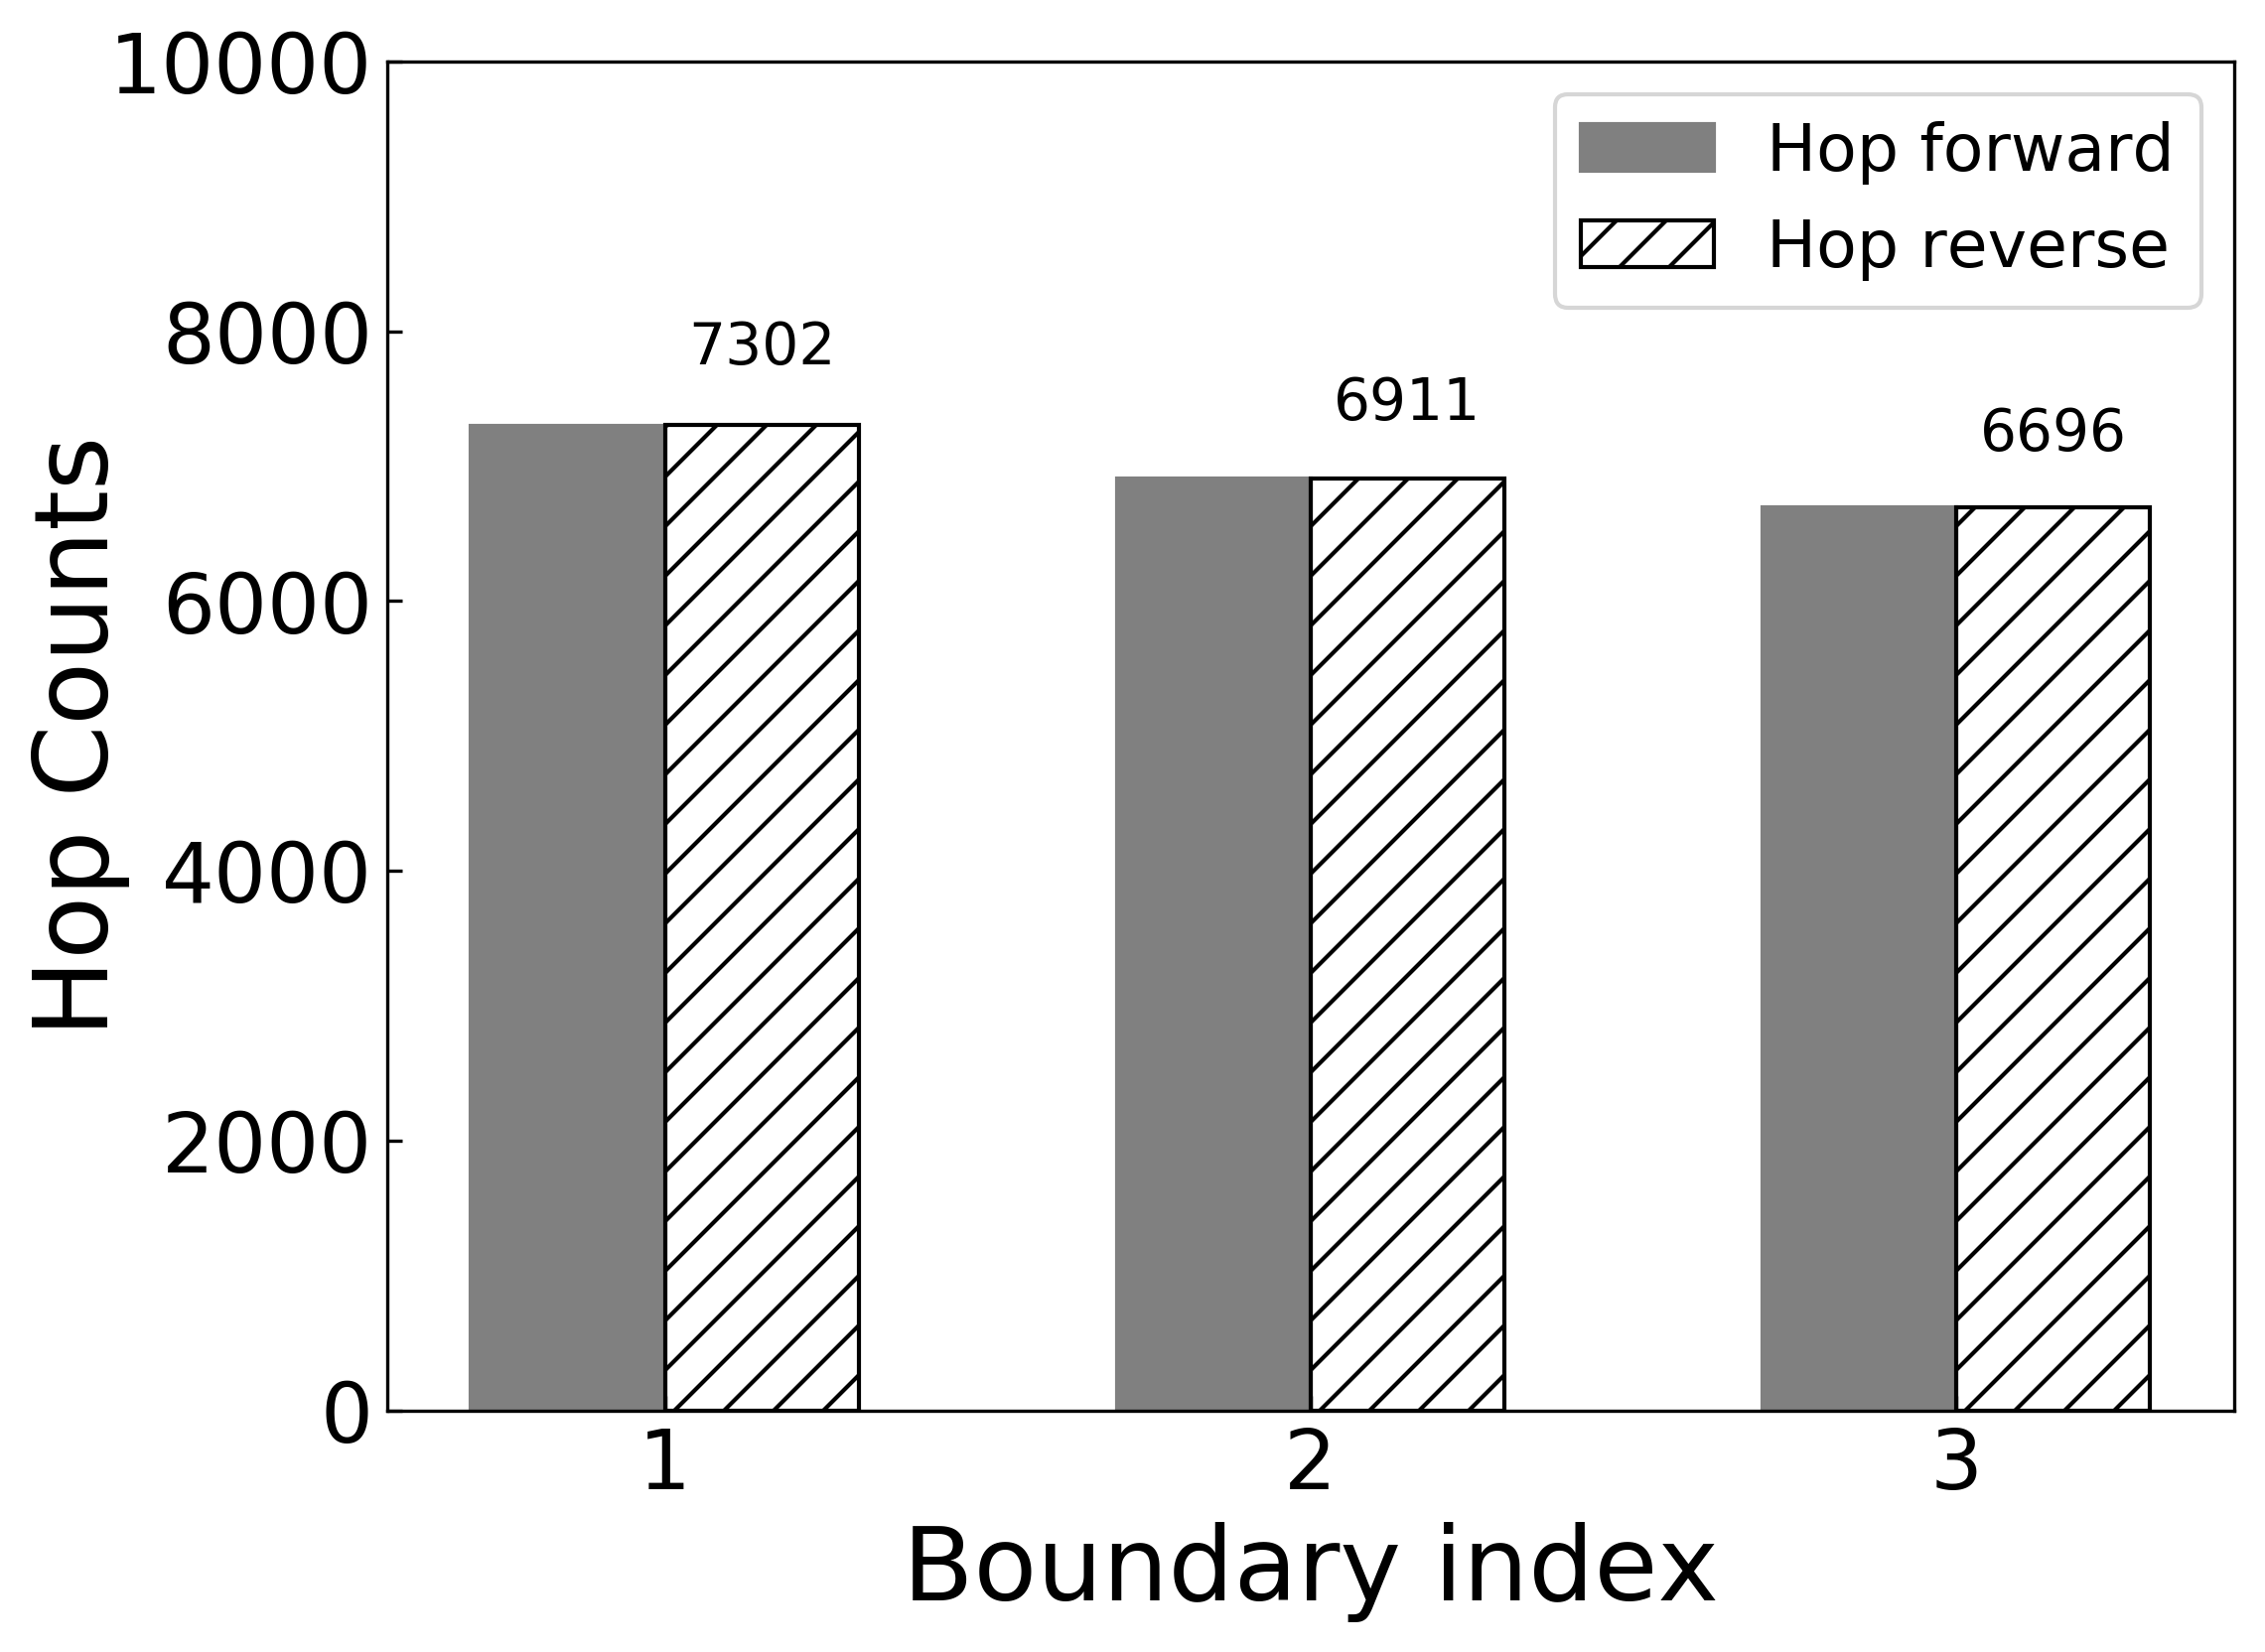

rate forward [0.43, 0.42, 0.44, 0.11, 2.2]
rate reverse [0.1, 0.41, 0.41, 0.43, 0.66]


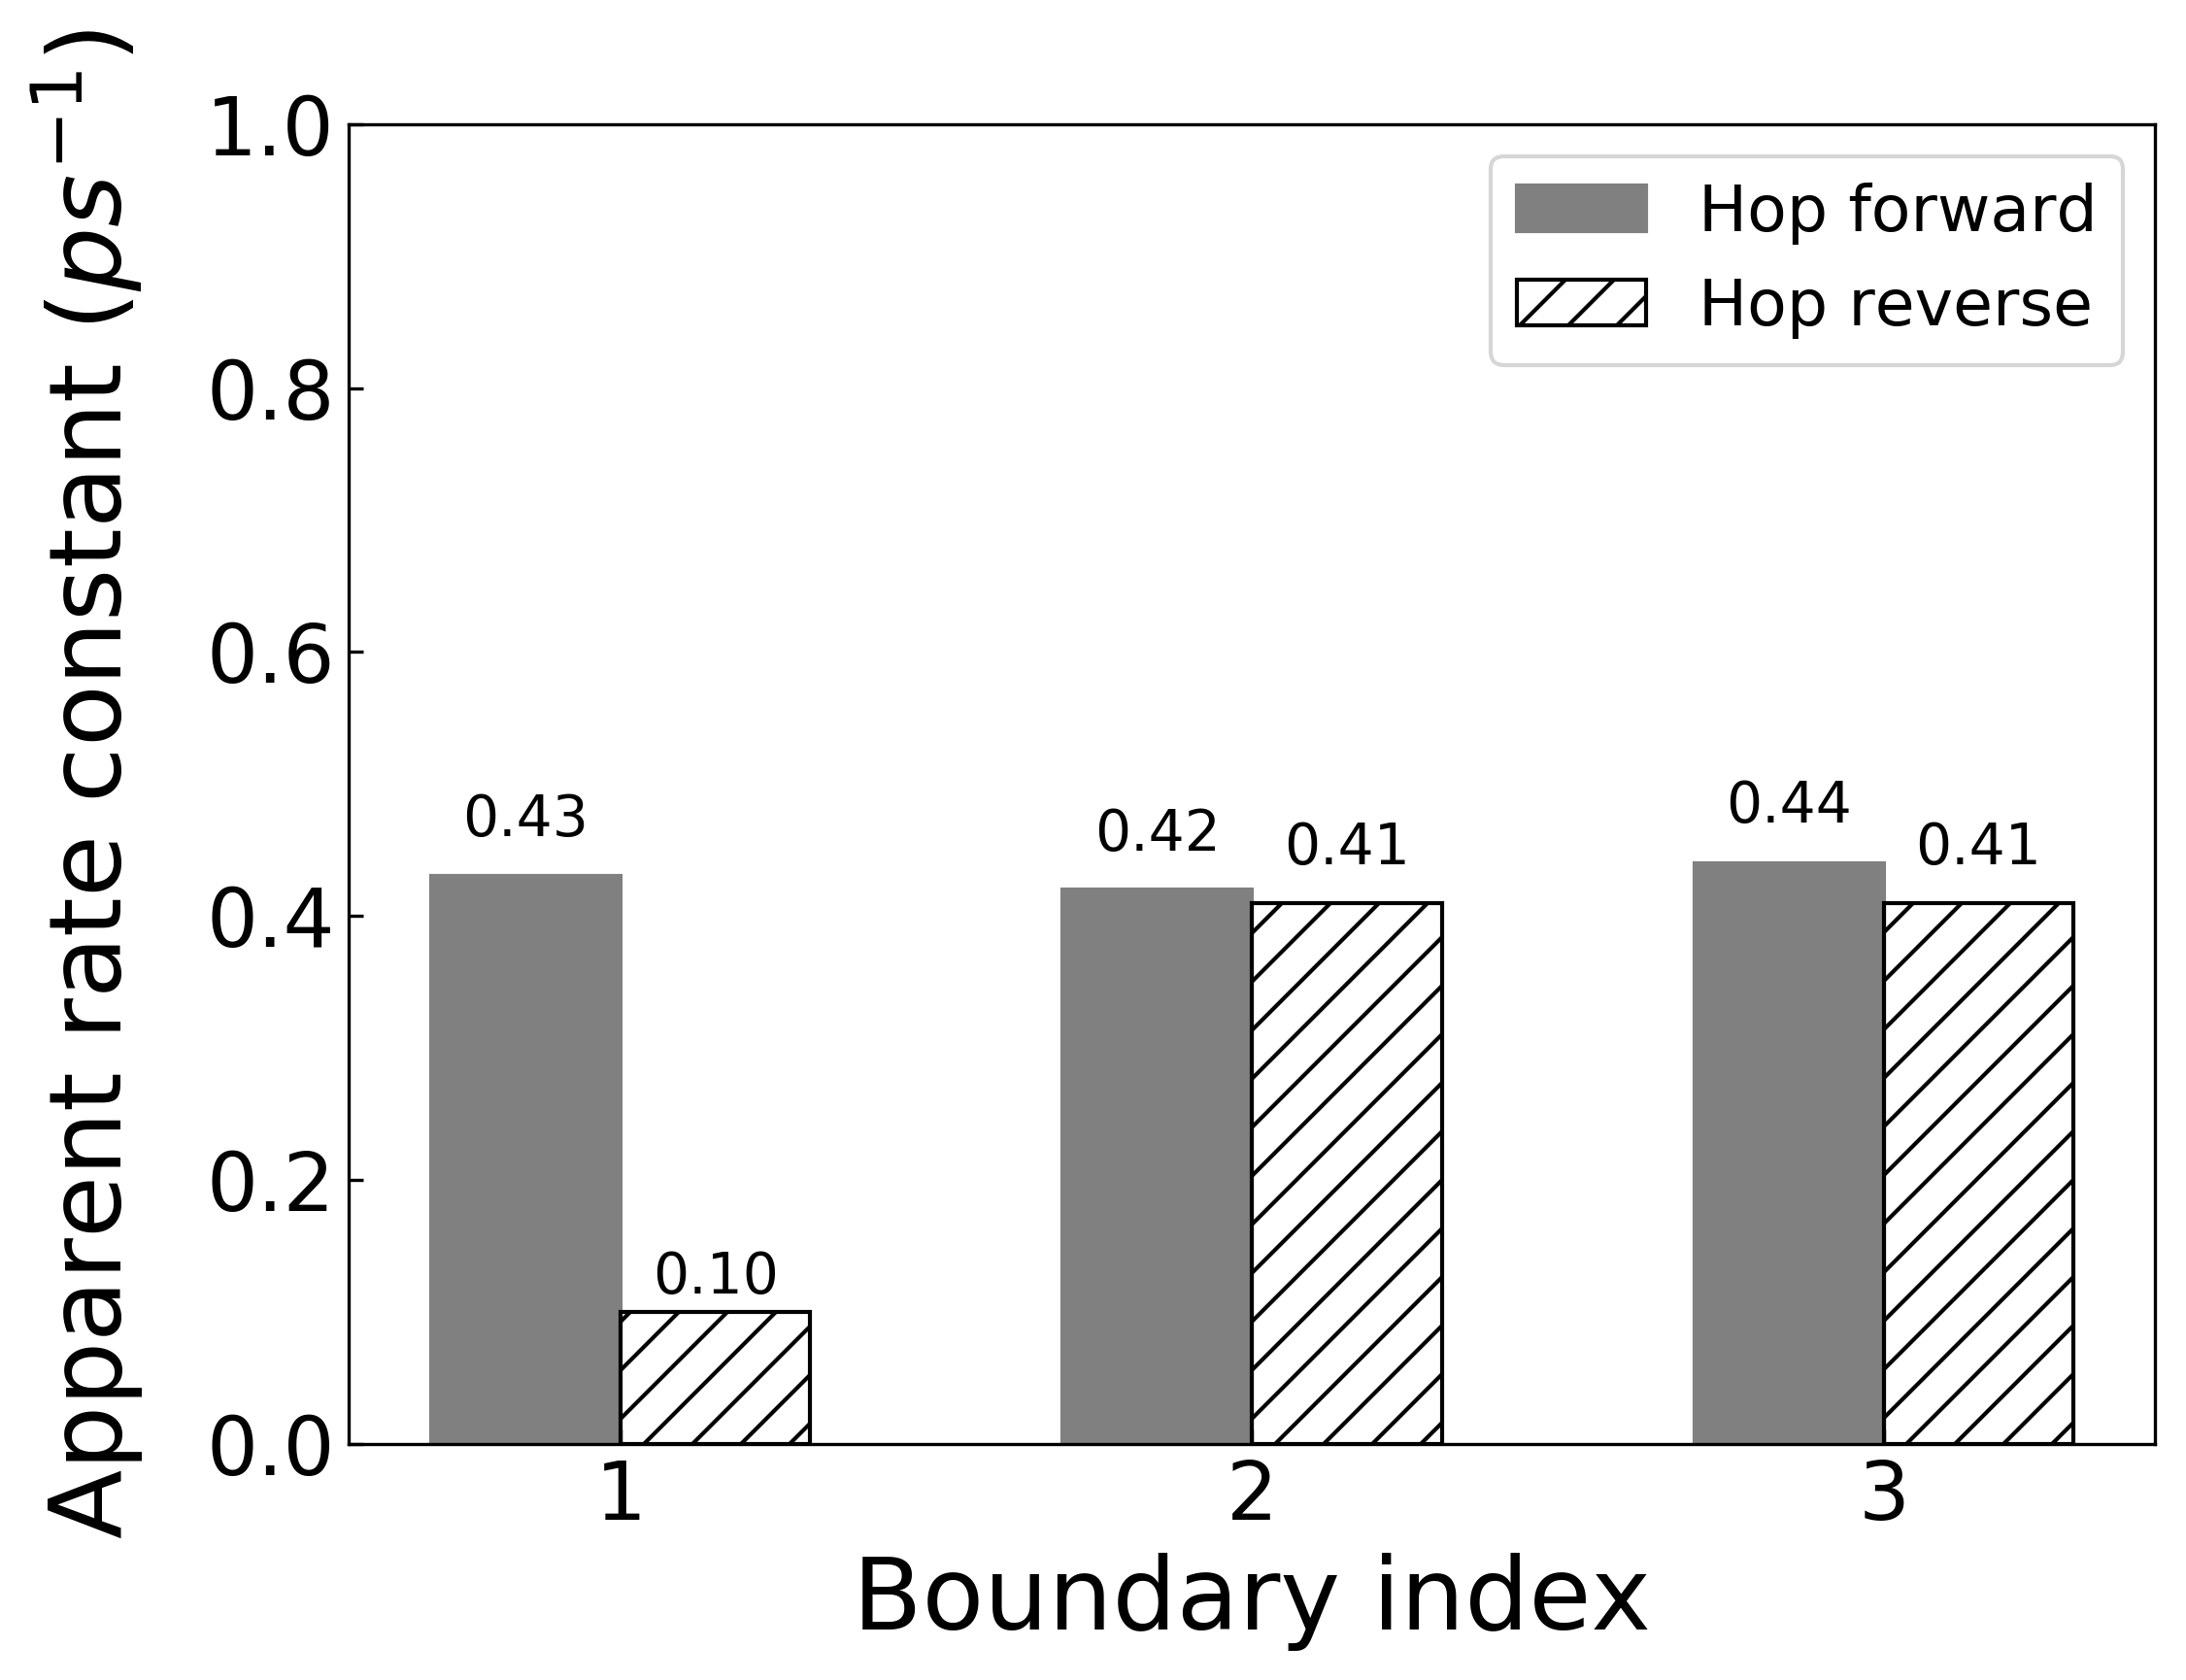

In [15]:
plotRateConstant()

In [18]:
def plotResTimeDistribution():
    """ plot RSDF from separated residence time distribution """
    bar_step = 1
    RSDF_dict = OrderedDict()
    RSDF_sep_dict = OrderedDict()  # used for plotting in paper
    key_list = list(resTime_dict.keys())  
    
    print(key_list)
        
    ######## combined resTime distribution ###########
    # This is not used for RSDF fit, just to extract the maximum individual residence time in each layer 
    for i in range (len(key_list)-2): # only need layer 1,2,3,4
        key = key_list[i]
        data_list = resTime_dict[key]
        max_resTime = np.max(data_list)  
        print ('L%s: max %s [10 fs]'%(key,max_resTime))
        bins = np.arange(0, max_resTime+2*bar_step, bar_step, dtype=int)  # start at 0.01 gives errors, 
    
        n, bins, patches = plt.hist(data_list, bins=bins, label='layer '+ key,
                                      histtype='stepfilled', alpha=0.8, cumulative=-1)

        RSDF_dict['X%s'%(i+1)] = [int (i) for i in bins[1:-1]]   # resTime [10 fs], remove last non-included bins
        RSDF_dict['Y%s'%(i+1)] = [int(i) for i in n[1:]] # cumulative probability

    
    ######## separate resTime distribution ###########
    # This is used for RSDF fitting in paper
    for i in range (len(key_list)-2): # only need layer1,2,3,4
        key = key_list[i]
        f_idx = 'B'+str(int(key)-1)+'F'
        r_idx = 'B'+str(int(key))+'R'
        
        ####### record forward ########
        if int(key) != 1: # first layer cannot hop forward 
            data_list = resTime_separate_dict[key][f_idx]
            max_resTime = np.max(data_list)         
            bins = np.arange(0, max_resTime+2*bar_step, bar_step, dtype=int)  # non-inclusive of right bracket
    
            n, bins, patches = plt.hist(data_list, bins=bins, label='f_idx',
                                      histtype='stepfilled', alpha=0.8, cumulative=-1)

            RSDF_sep_dict['X%s'%(f_idx)] = bins[1:-1]              # resTime [fs], remove last non-included bins
            RSDF_sep_dict['Y%s'%(f_idx)] = [int(i) for i in n[1:]] # cumulative probability        

        ######## record reverse #########
        data_list = resTime_separate_dict[key][r_idx]
        max_resTime = np.max(data_list)
        bins = np.arange(0, max_resTime+2*bar_step, bar_step, dtype=int)
        n, bins, patches = plt.hist(data_list, bins=bins, label='r_idx',
                                      histtype='stepfilled', alpha=0.8, cumulative=-1)       
        RSDF_sep_dict['X%s'%(r_idx)] = [int (i) for i in bins[1:-1]]                # resTime [10 fs], remove last non-included bins
        RSDF_sep_dict['Y%s'%(r_idx)] = [int(i) for i in n[1:]] # cumulative probability         
        
    return RSDF_sep_dict       

#     return RSDF_dict,RSDF_sep_dict    

['1', '2', '3', '4', '5', '6']
L1: max 22383 [10 fs]
L2: max 3207 [10 fs]
L3: max 3061 [10 fs]
L4: max 3522 [10 fs]


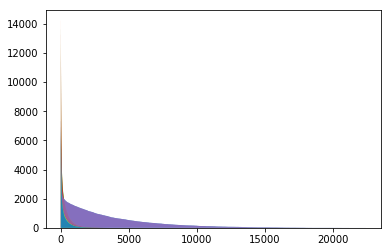

In [19]:
RSDF_sep_dict = plotResTimeDistribution()
#For paper, use the maximum individual visit residence time

In [20]:
# do not fit I, which is initial value of RSDF
def twoFactorFunc(x, a, b, c, I=10):
    # plot two exponential function for bulk layer"""     
    return a*np.exp(-b*x) + (I-a)*np.exp(-c*x)  
def threeFactorFunc(x, a, b, c, d, e, I=100):  
    # plot three exponential factor function for adsorbed layer"""       
    return a*np.exp(-c*x) + b*np.exp(-d*x) + (I-a-b)*np.exp(-e*x)  

In [23]:
# use RSDF_dict to fit adsorption rate constant
# bulk layer with two factors, plot the original data and fitted

def plotTwoBulkRSDF(RSDF_sep_dict):
   
    key_list = list(RSDF_sep_dict.keys()) # ['XB1R', 'YB1R', 'XB1F', 'YB1F', 'XB2R', 'YB2R', 'XB2F', 'YB2F', 'XB3R', 'YB3R', 'XB3F', 'YB3F', 'XB4R', 'YB4R']
    print(key_list)
    ######### plot two exponential for bulk layer #################
    bulk_params_dict = OrderedDict()     # params and 95% confidence of all params in bulk layer
    for i in range (2,len(key_list),2):  # plot for different bulk layers 2, 3, 4
        fig = plt.figure(figsize=(8,6), dpi=300)
        ax = fig.add_subplot(111)
        
        b_idx = key_list[i][1:]   # boundary index   
        print(b_idx)        
        ### fill all probability that is longer than e.g. 30ps
        x0 = np.asarray([j/100 for j in RSDF_sep_dict[key_list[i]]])    # Lifetime, convert to [ps]
        y0 = np.asarray(RSDF_sep_dict[key_list[i+1]])                   # Cumulative probability 
#         print(len(x0)) # e.g., 3207 elements
        ###### now fill x0 to 20000 elemnts with following number of 0
        x = list(np.arange(0,200,0.01)) # draw total of 200 ps
        y = [0]*20000
        for i in range(20000):
            if i < len(y0):
                y[i] = y0[i]           

        I = y[0]                      # initial value of RSDF
        popt, pcov = curve_fit(lambda x,a,b,c:twoFactorFunc(x,a,b,c,I=I), x, y, p0=(200,2.5,0.25), 
                               bounds=((0, 0, 0), (I, np.inf, np.inf)))
        
        ########### 95% confidence #############
        alpha = 0.05  # 95% confidence interval = 100*(1-alpha)    
        n = len(y)  # number of data points
        p = len(popt)  # number of parameters    
        dof = max(0, n - p)  # number of degrees of freedom   
        # student-t value for the dof and confidence level
        tval = t.ppf(1.0 - alpha / 2., dof)
        bulk_params_dict[b_idx]=[]
        for i, p, var in zip(range(n), popt, np.diag(pcov)):
            sigma = var ** 0.5
            bulk_params_dict[b_idx].append(['p%i'%i,p,sigma*tval])  # pi: ith fit parameter
        bulk_params_dict[b_idx].append([popt[0],popt[1],I-popt[0],popt[2]]) # [0]*exp([1]) + (I-[0])*exp([2])
        ax.plot(x, y, 'o', mec='silver', mfc='none', label="Raw data")
        y1 = [popt[0]*np.exp(-popt[1]*i) for i in x]
        y2 = [(I-popt[0])*np.exp(-popt[2]*i) for i in x]
        yt = [i + j for i, j in zip(y1, y2)]
        ax.plot(x, yt, 'black', linewidth=3, label="Fitted data")
        ax.plot(x, y1, 'b', linewidth=3, label="State 1")
        ax.plot(x, y2, 'r', linewidth=3, label="State 2")

        plt.xlabel('Residence time (ps)', fontsize=25)
        plt.ylabel('Counts', fontsize=25)
        plt.legend(fontsize=16)
        ax.tick_params(direction='in',labelsize=20)


        popt = [round(a,3) for a in popt]
        x = sp.Symbol('t') 
        f1 = popt[0]*sp.exp(-popt[1]*x)
        f2 = (I-popt[0])*sp.exp(-popt[2]*x)
        P1 = r'$P(\tau>t)$ = ' + str(f1) + '+'
        P2 = str(f2)
        ax.text(30,3000, P1, fontsize=16)   
        ax.text(68,2500, P2, fontsize=16)   
        ax.set_xlim(-10, 200, 50)
        ax.set_ylim(-500,8000,2000)
        plt.yticks(np.arange(0, 8001, 2000)) 
        plt.show()

    return bulk_params_dict

['XB1R', 'YB1R', 'XB1F', 'YB1F', 'XB2R', 'YB2R', 'XB2F', 'YB2F', 'XB3R', 'YB3R', 'XB3F', 'YB3F', 'XB4R', 'YB4R']
B1F


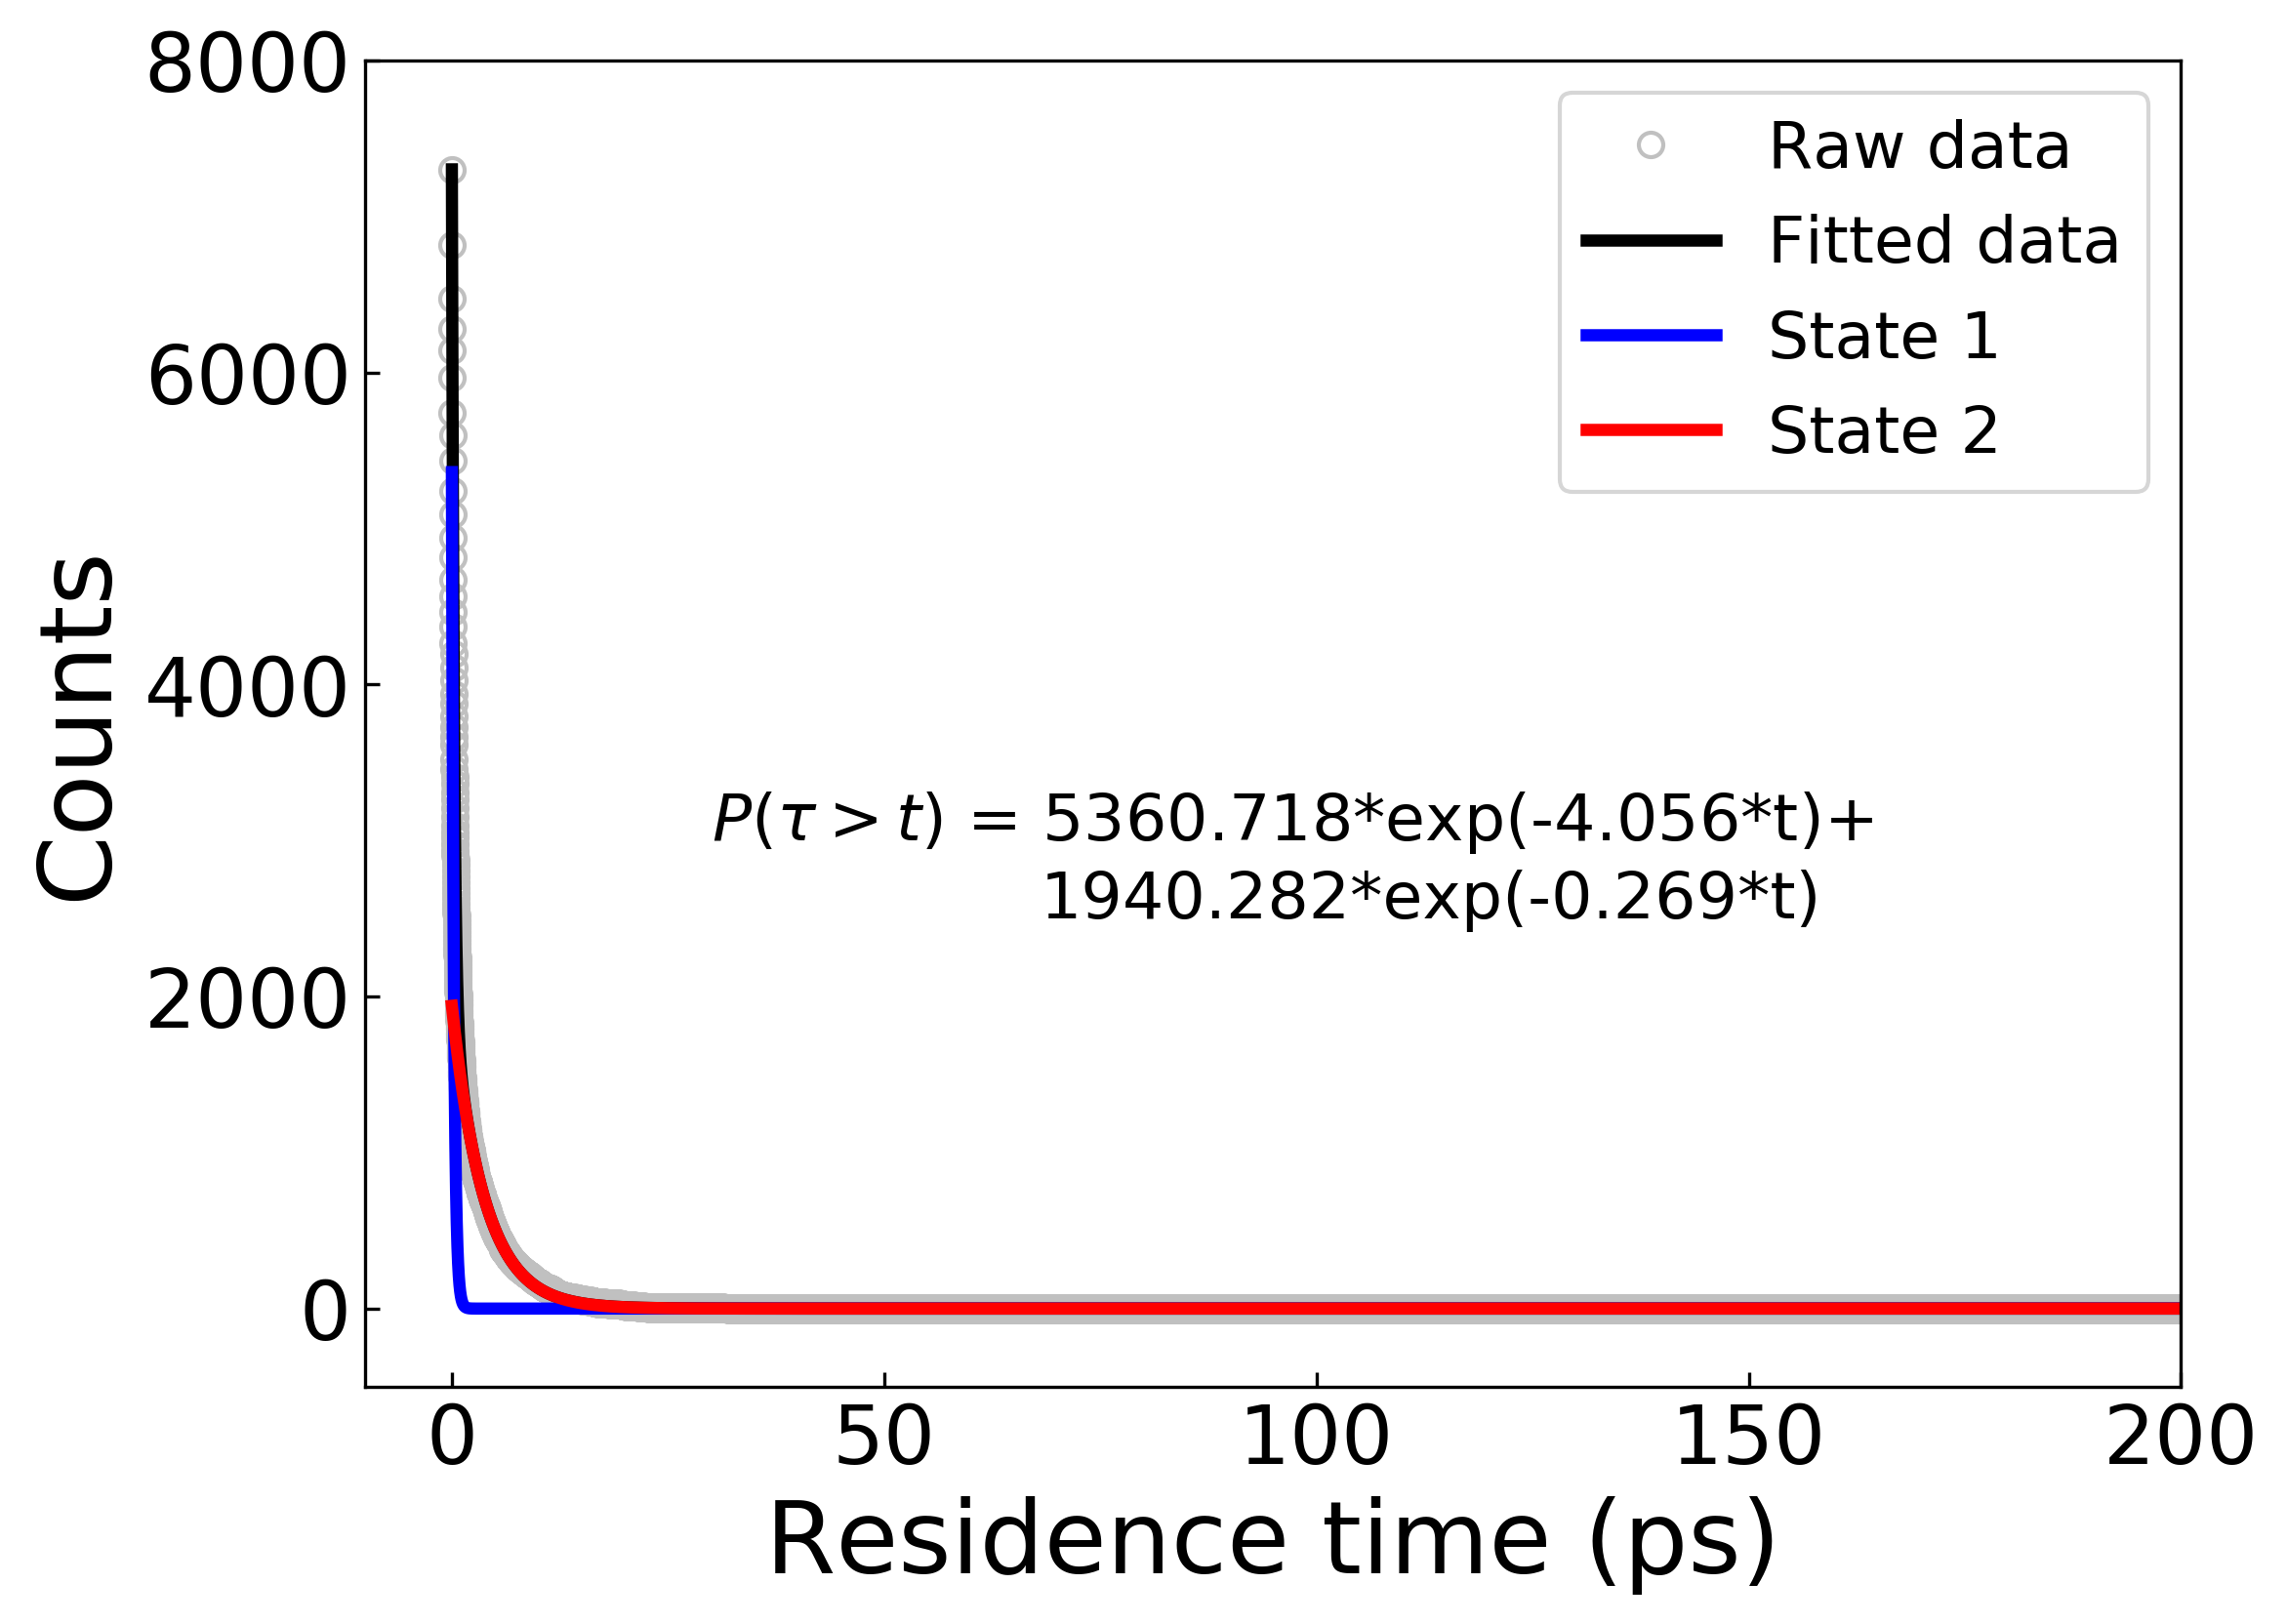

B2R


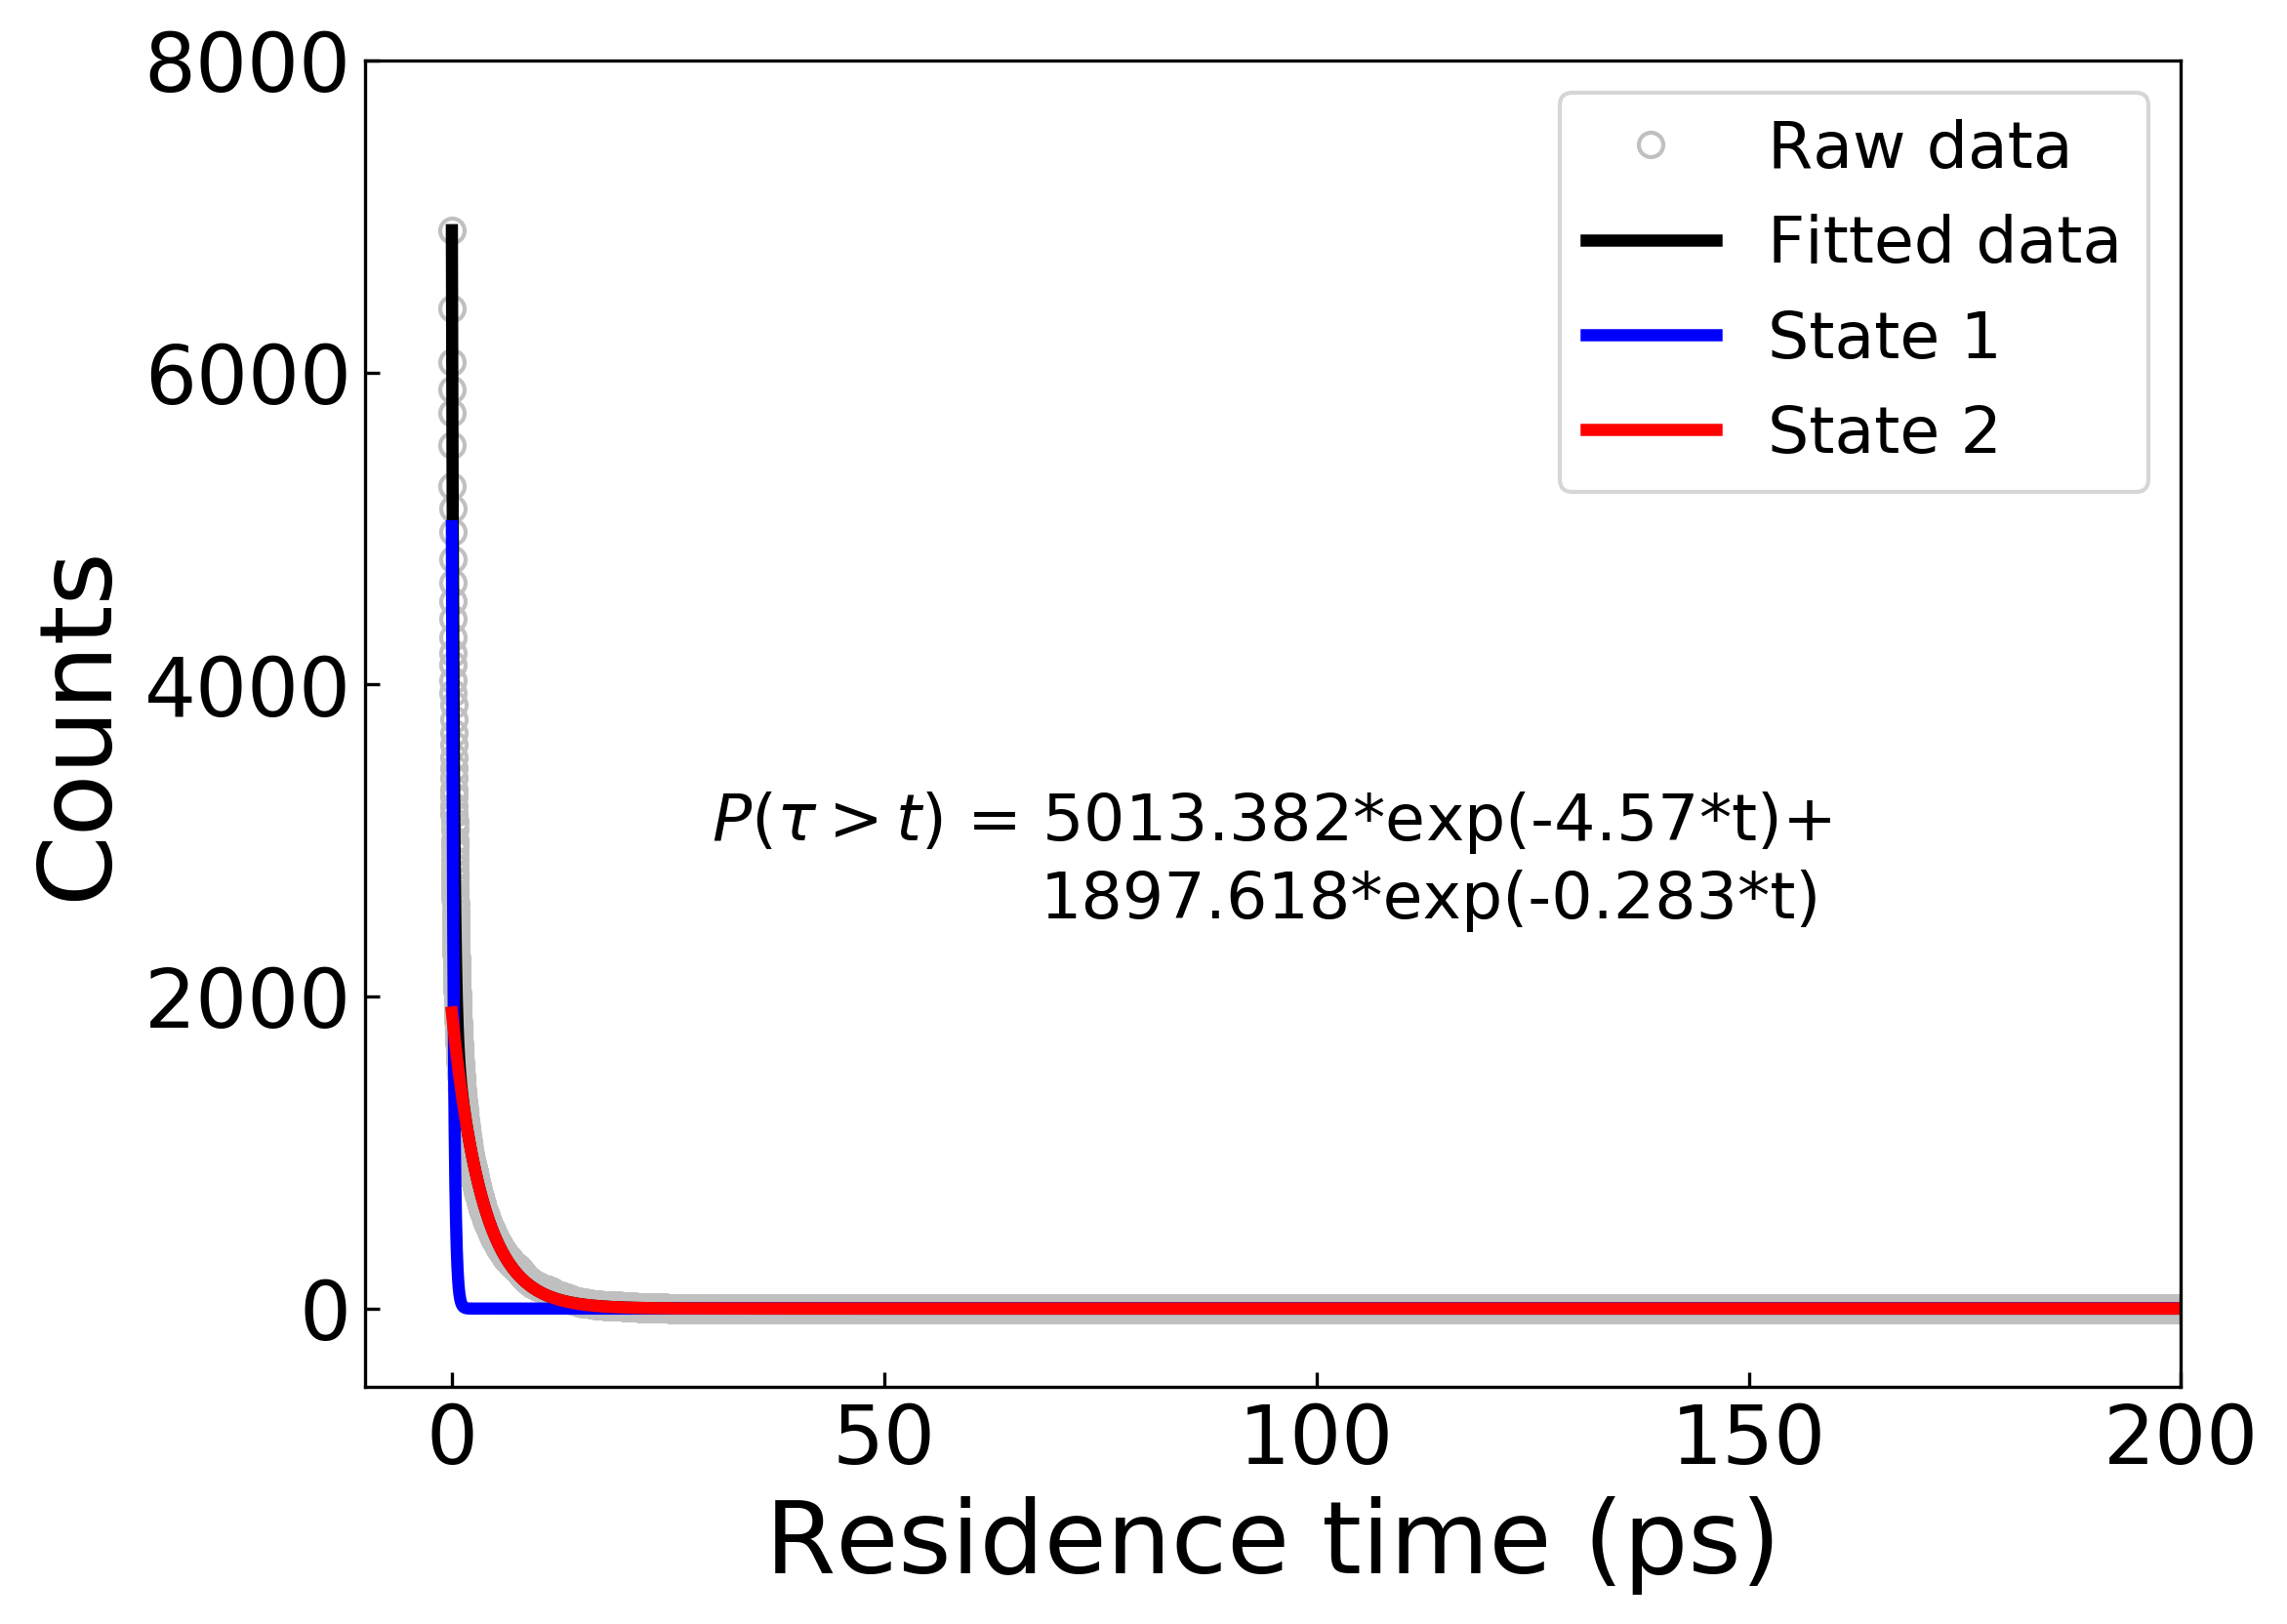

B2F


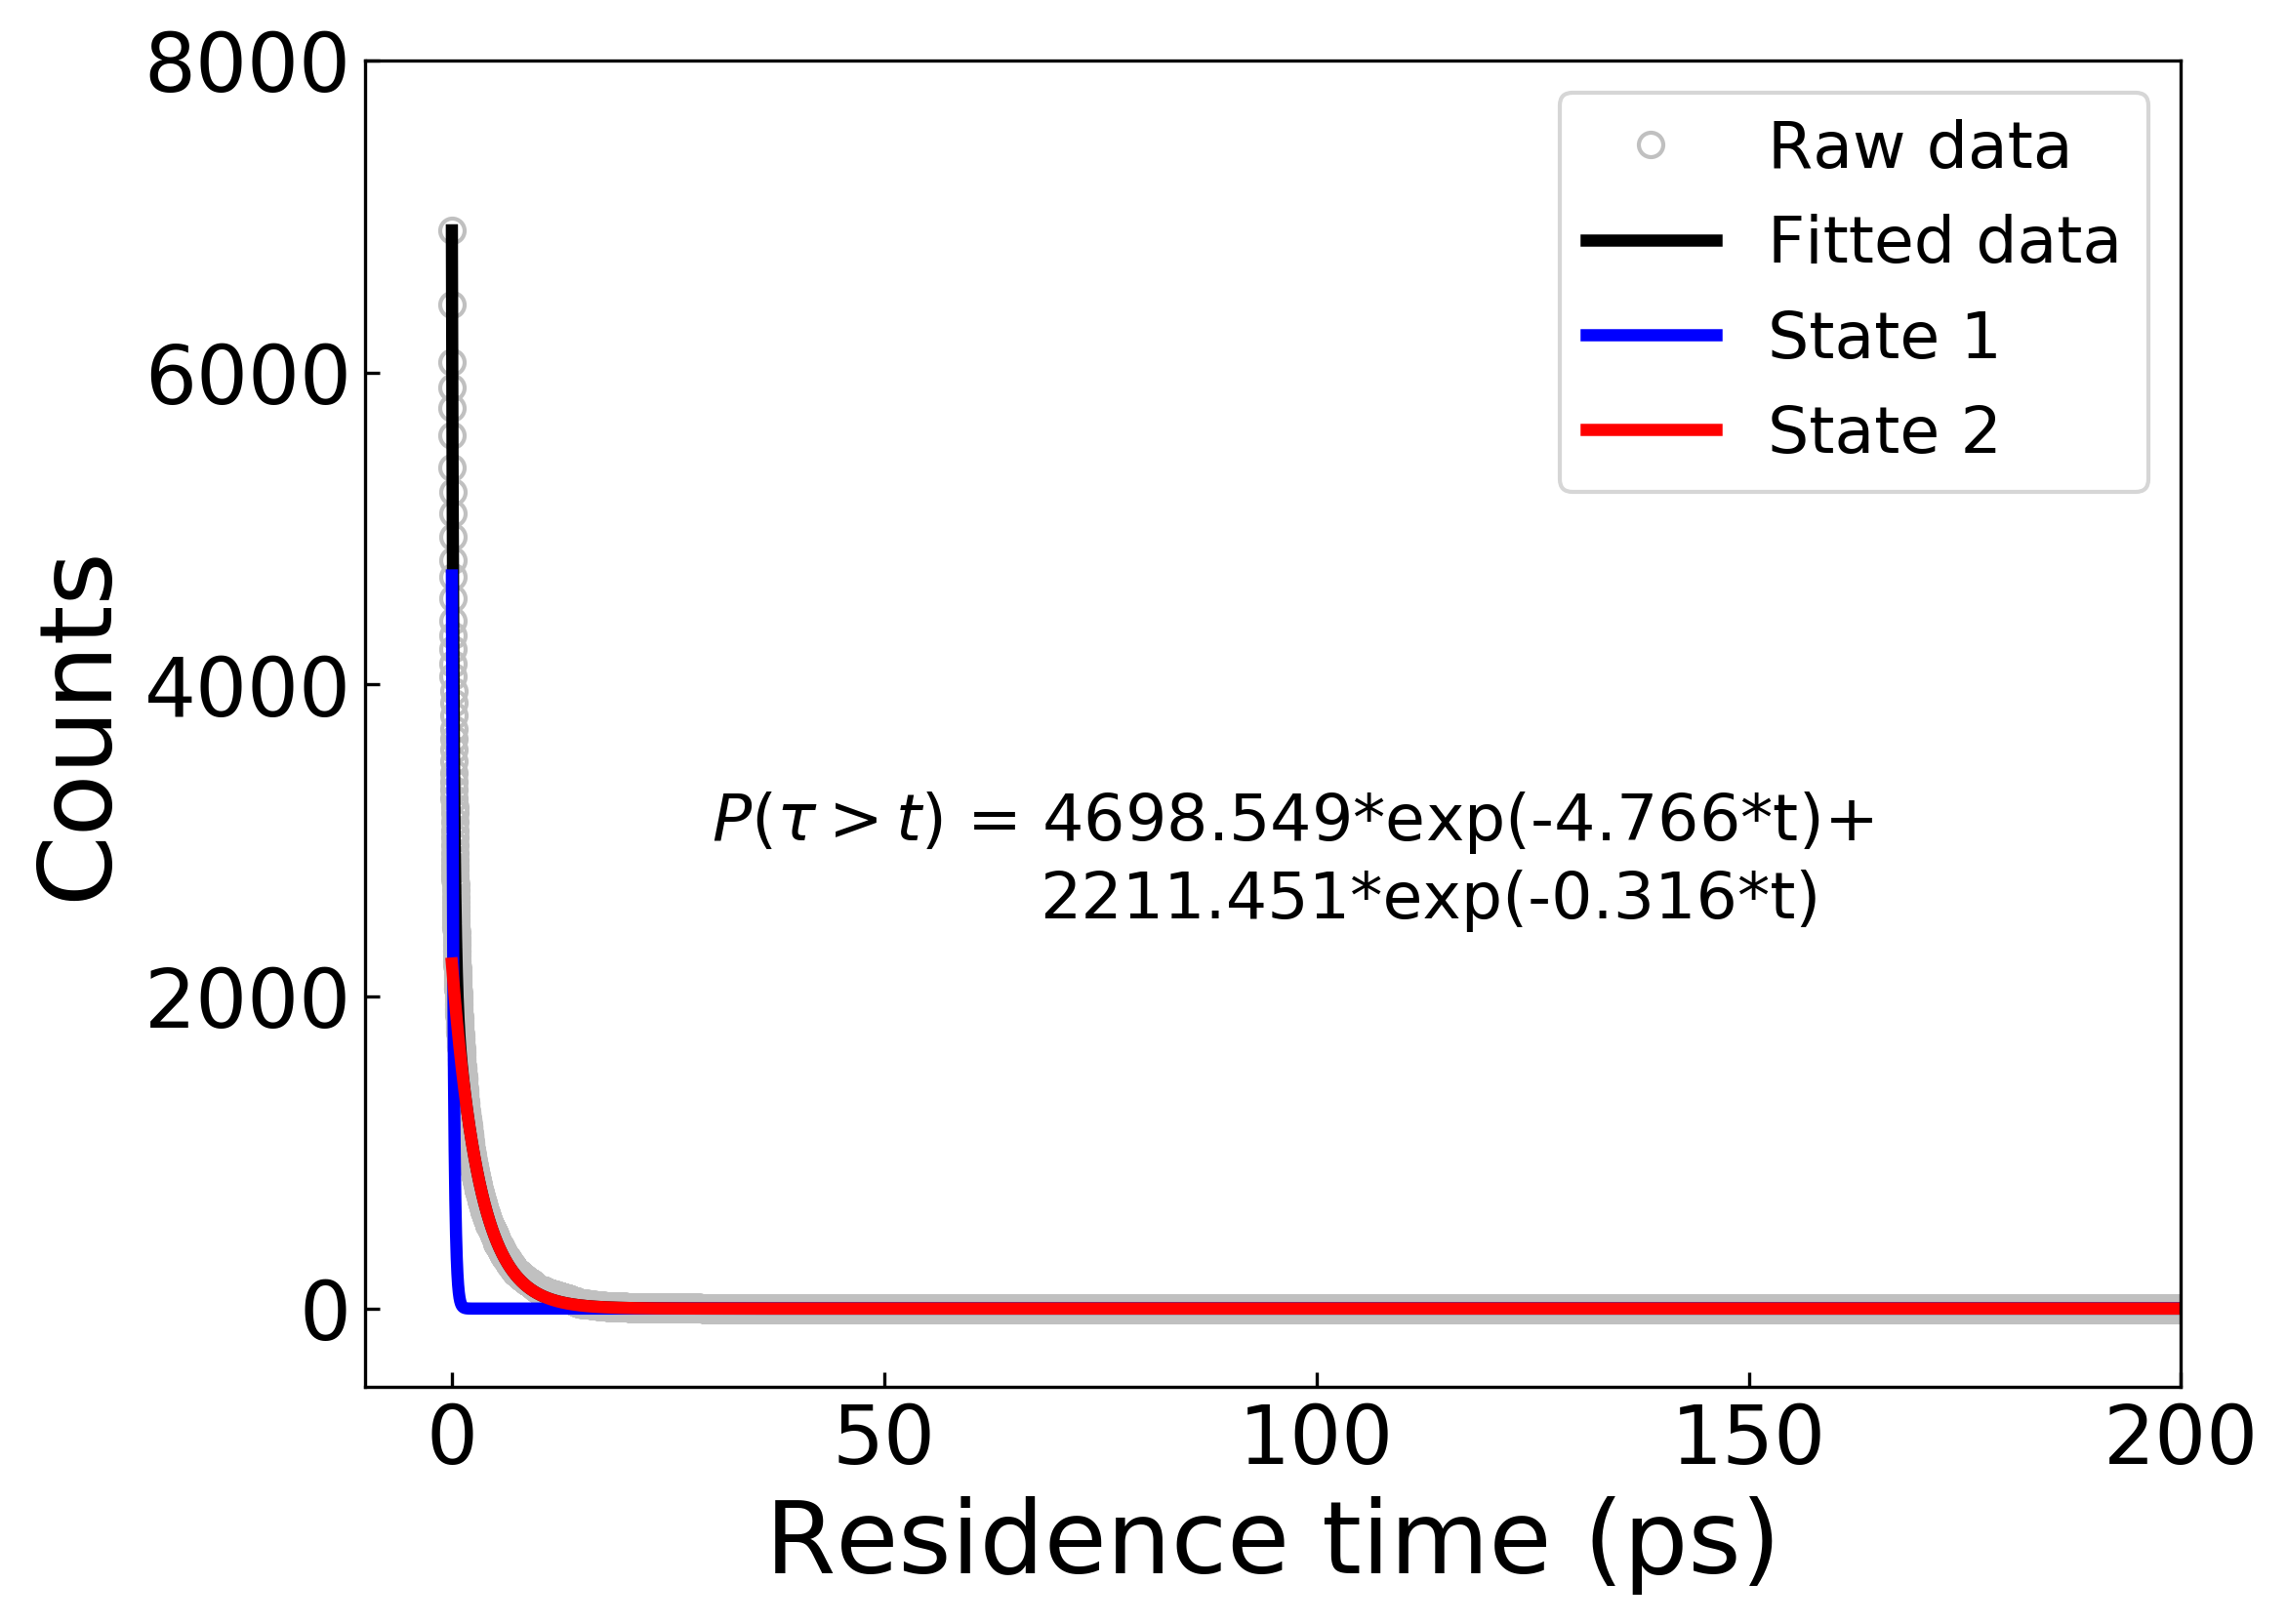

B3R


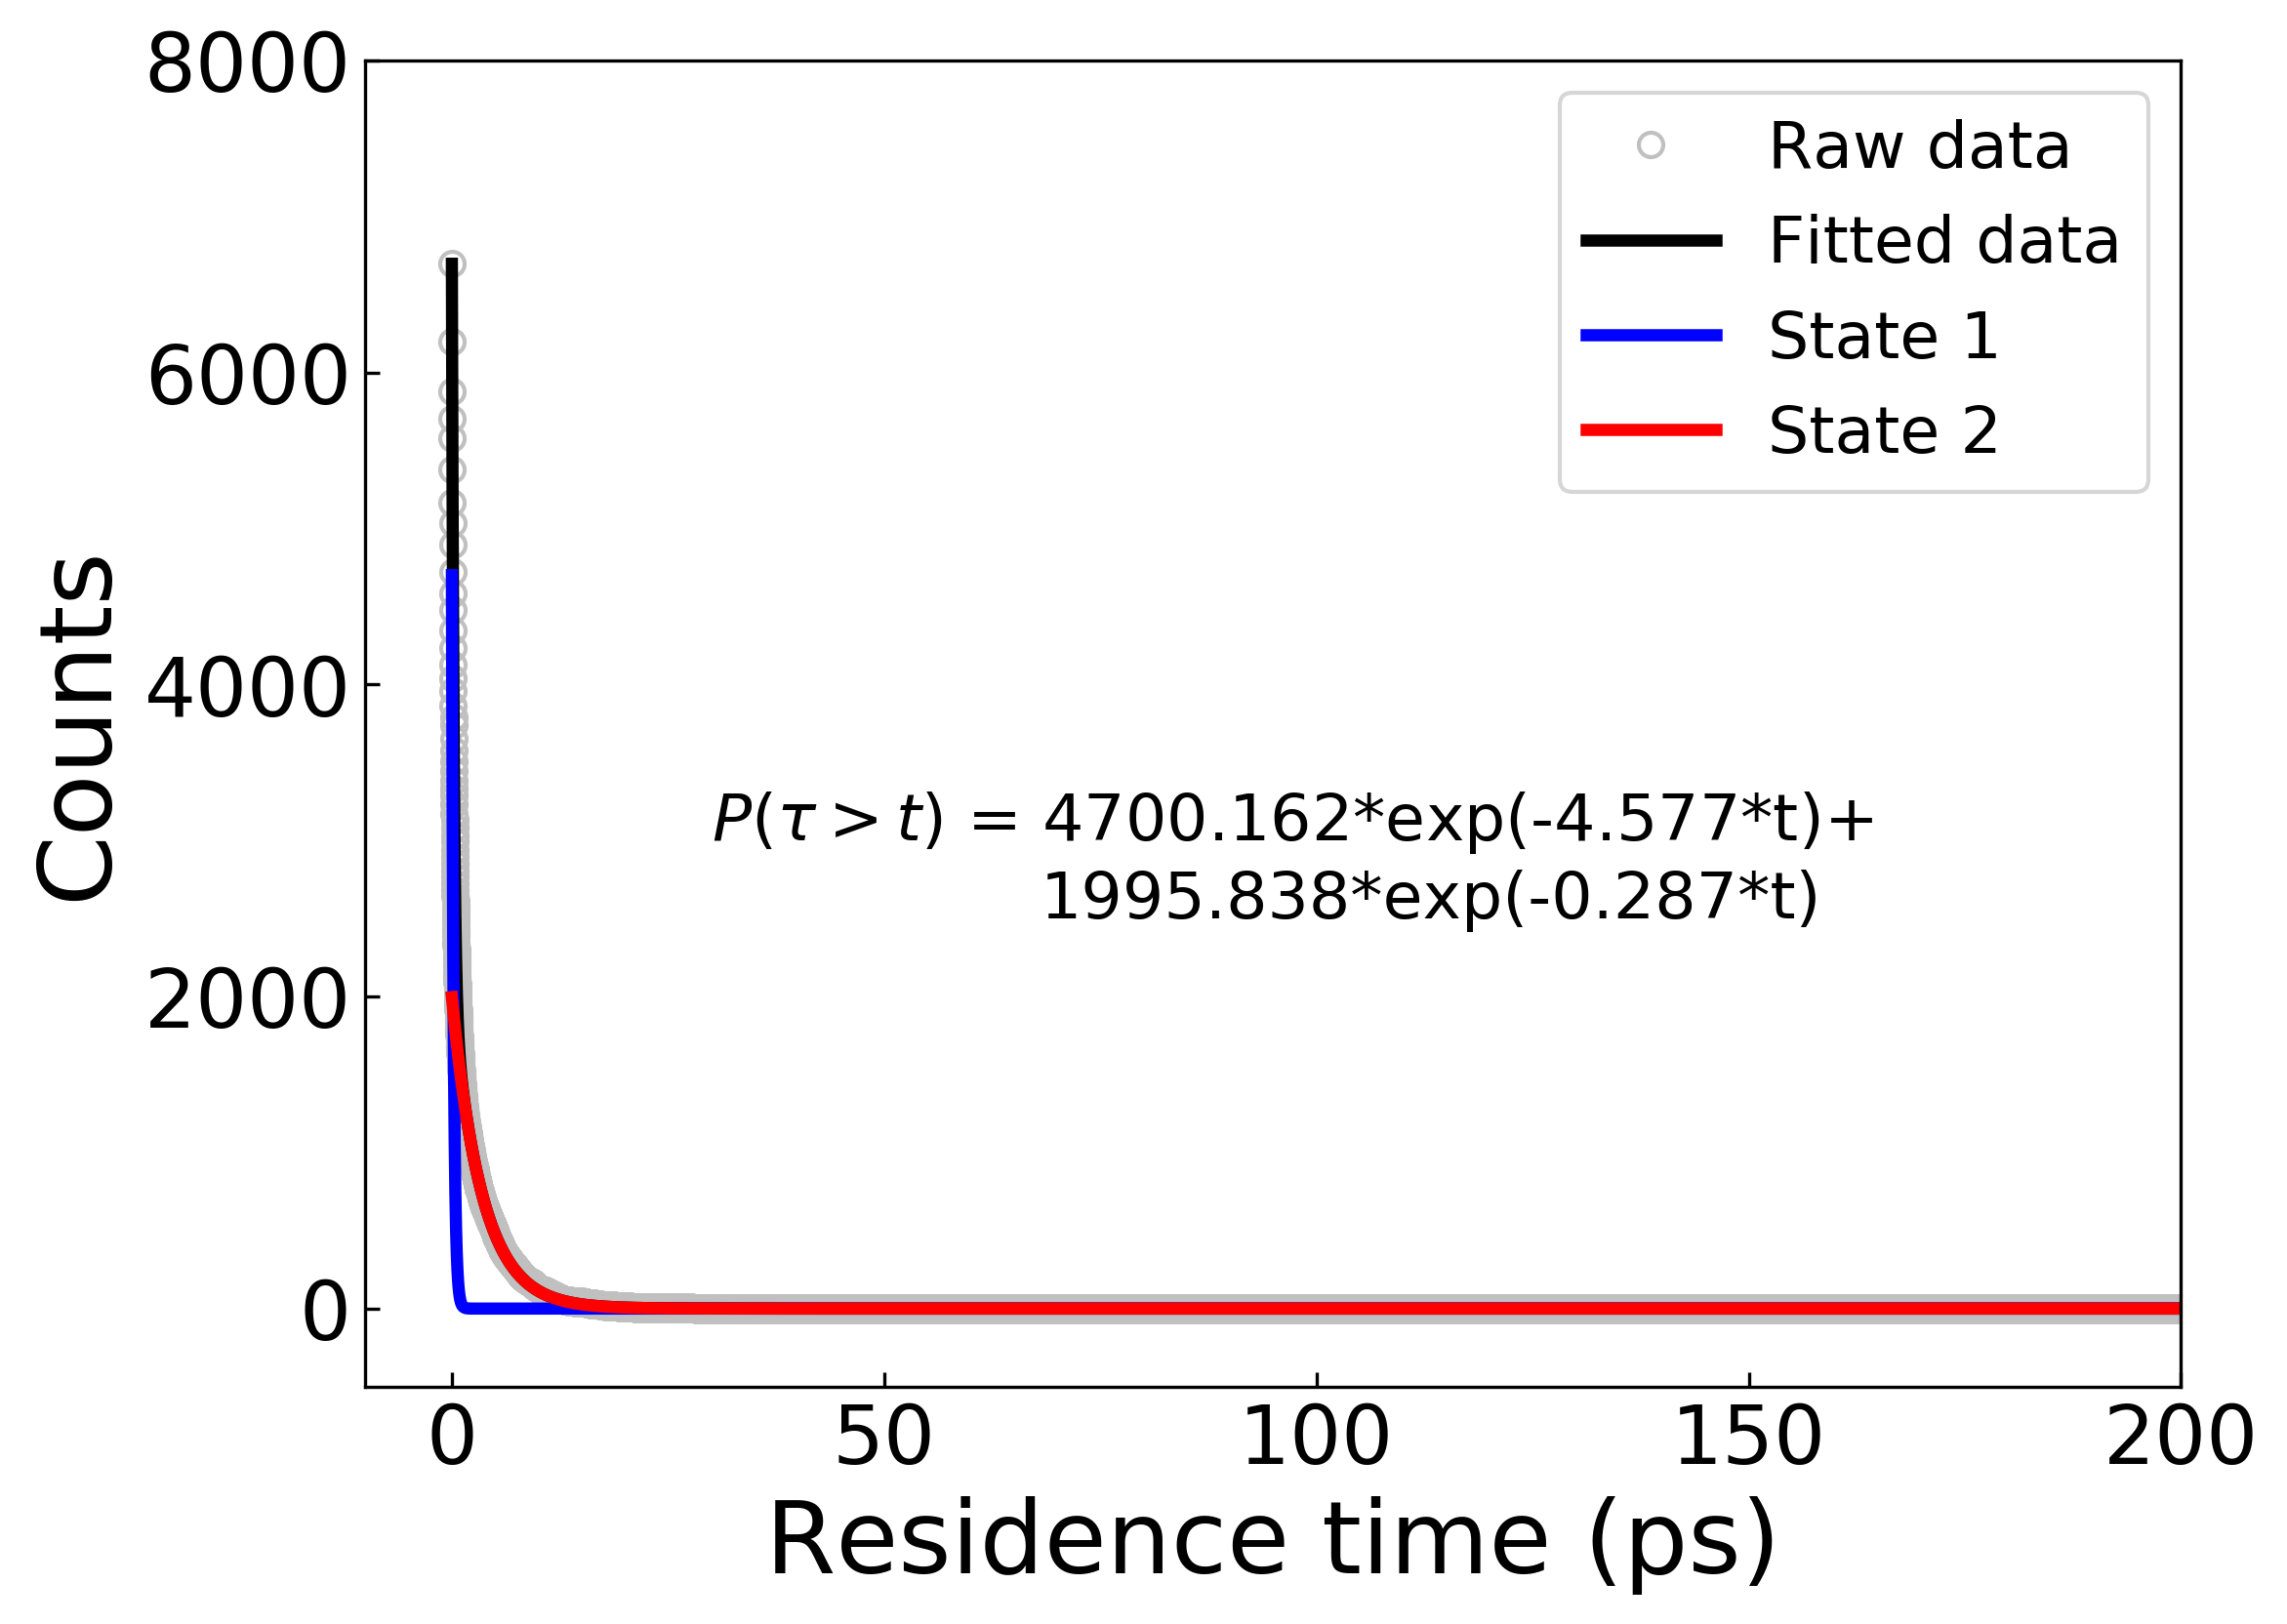

B3F


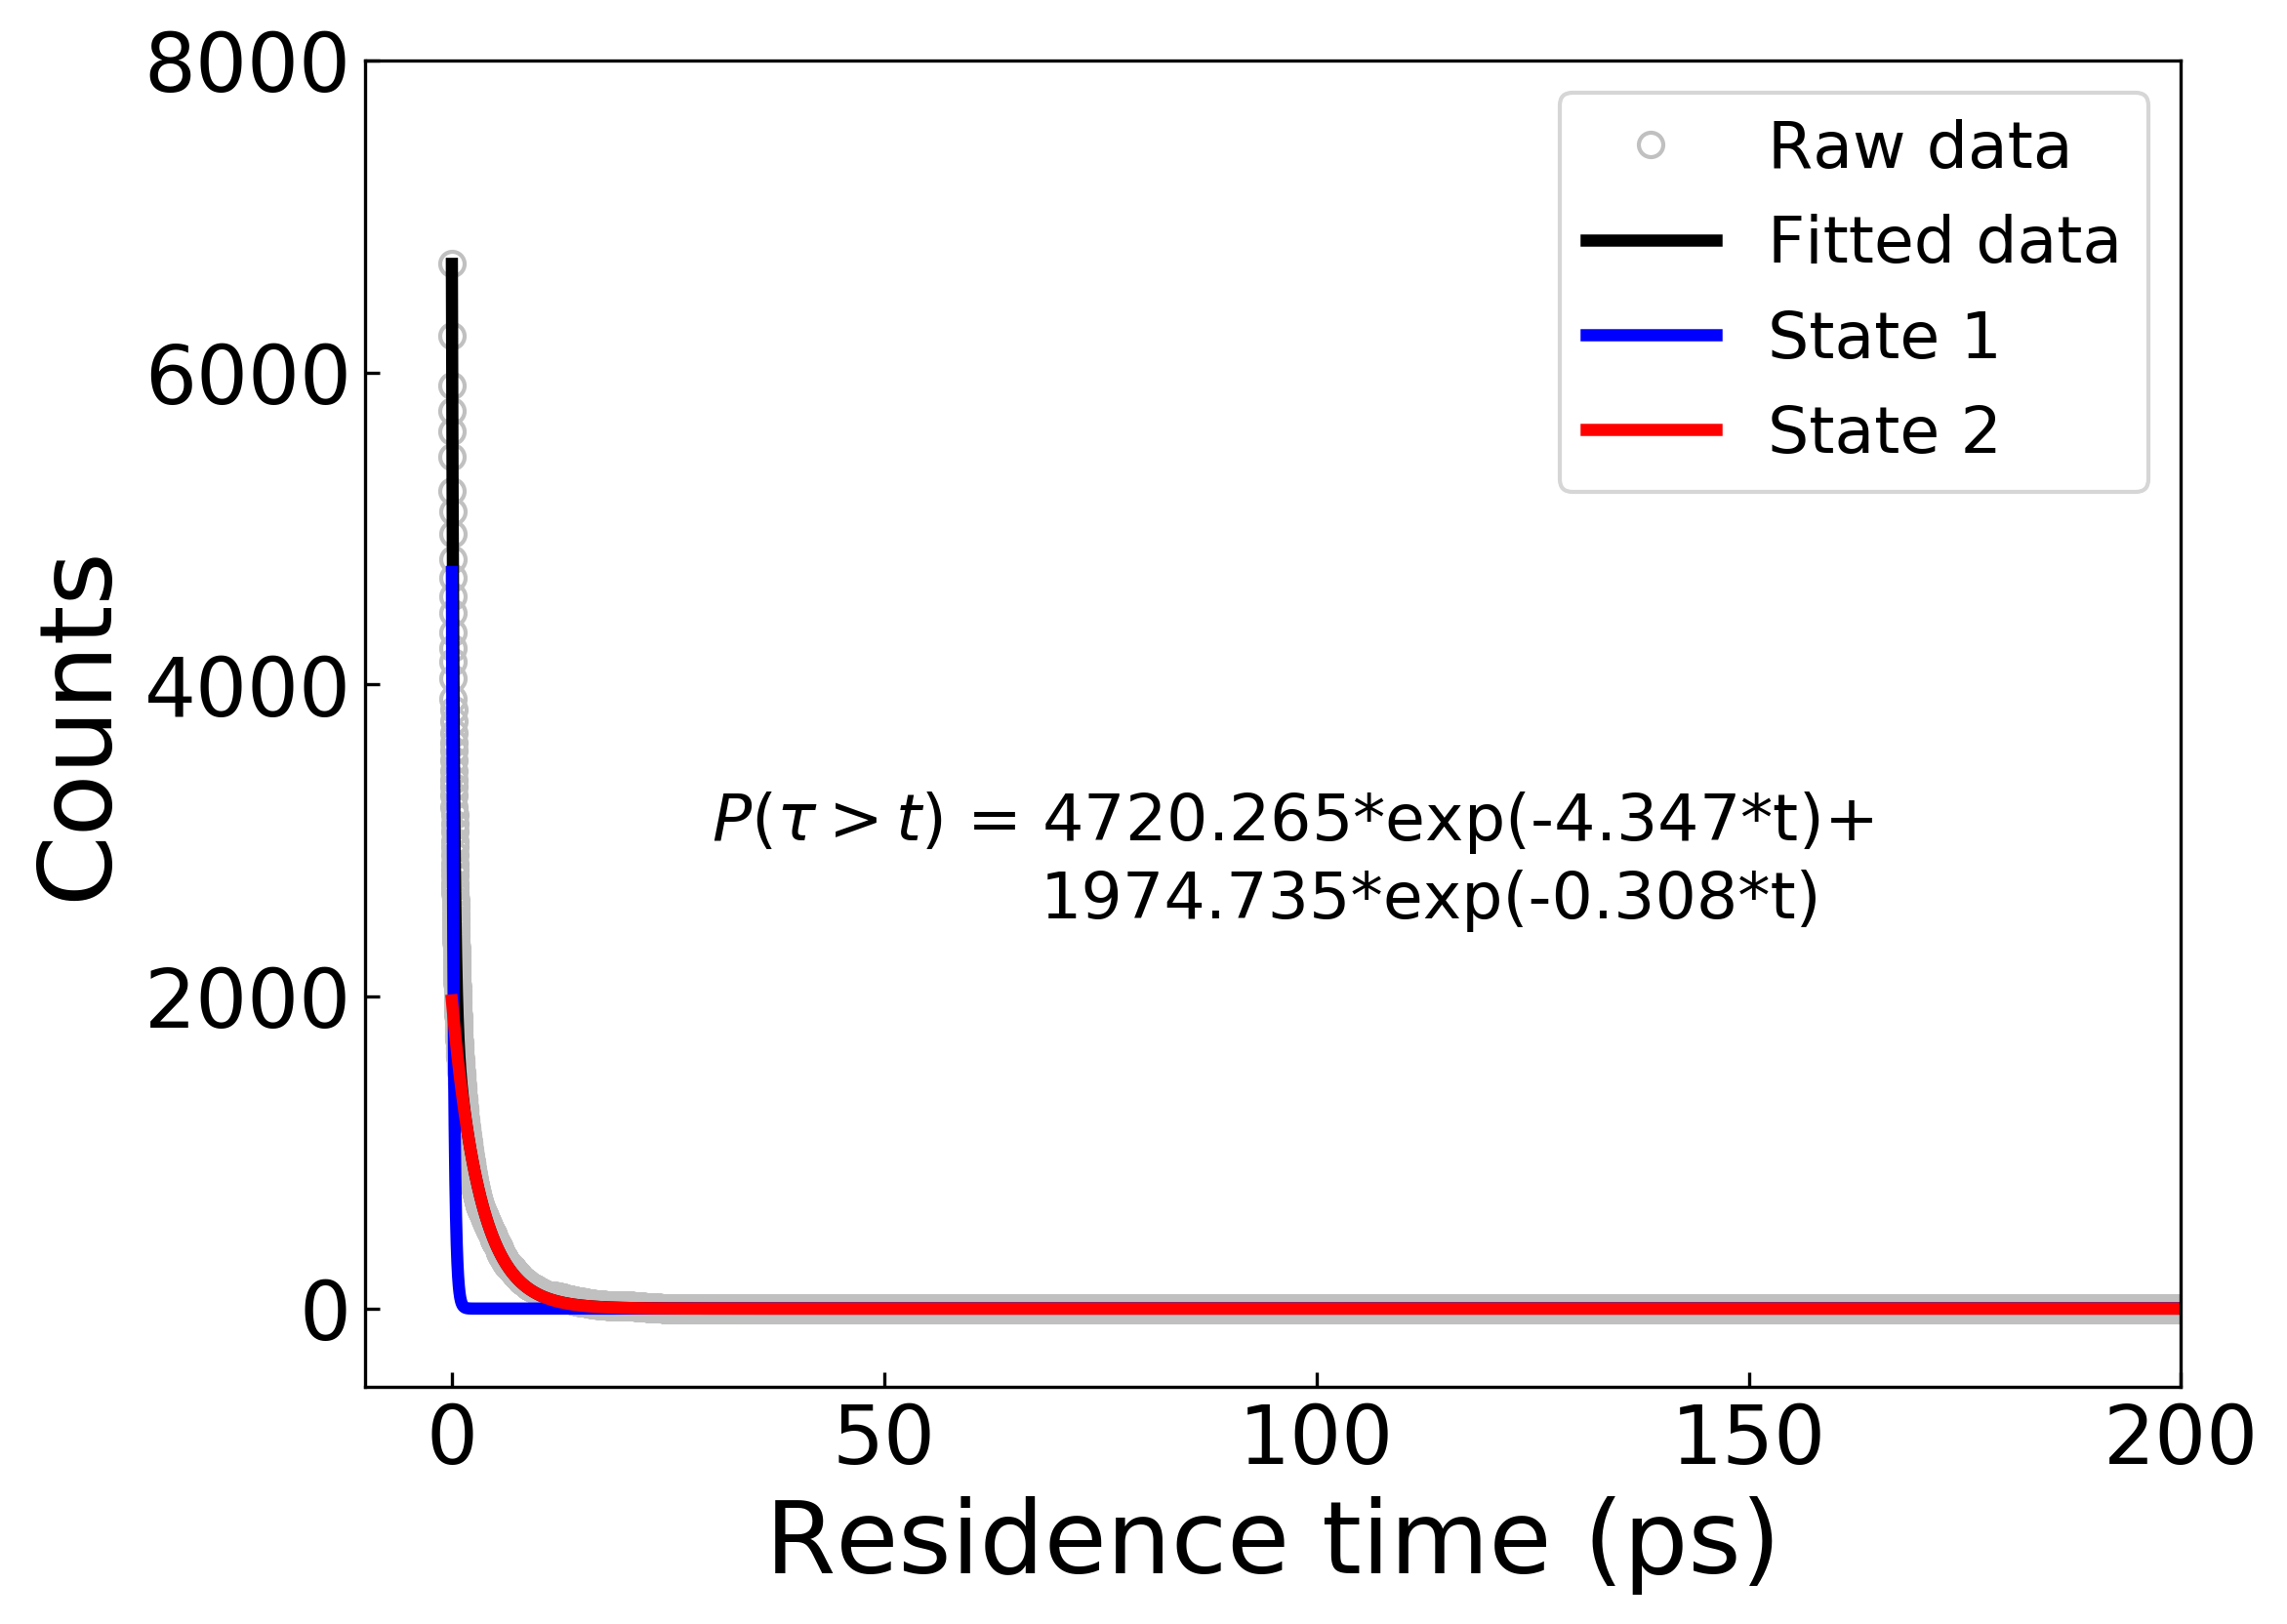

B4R


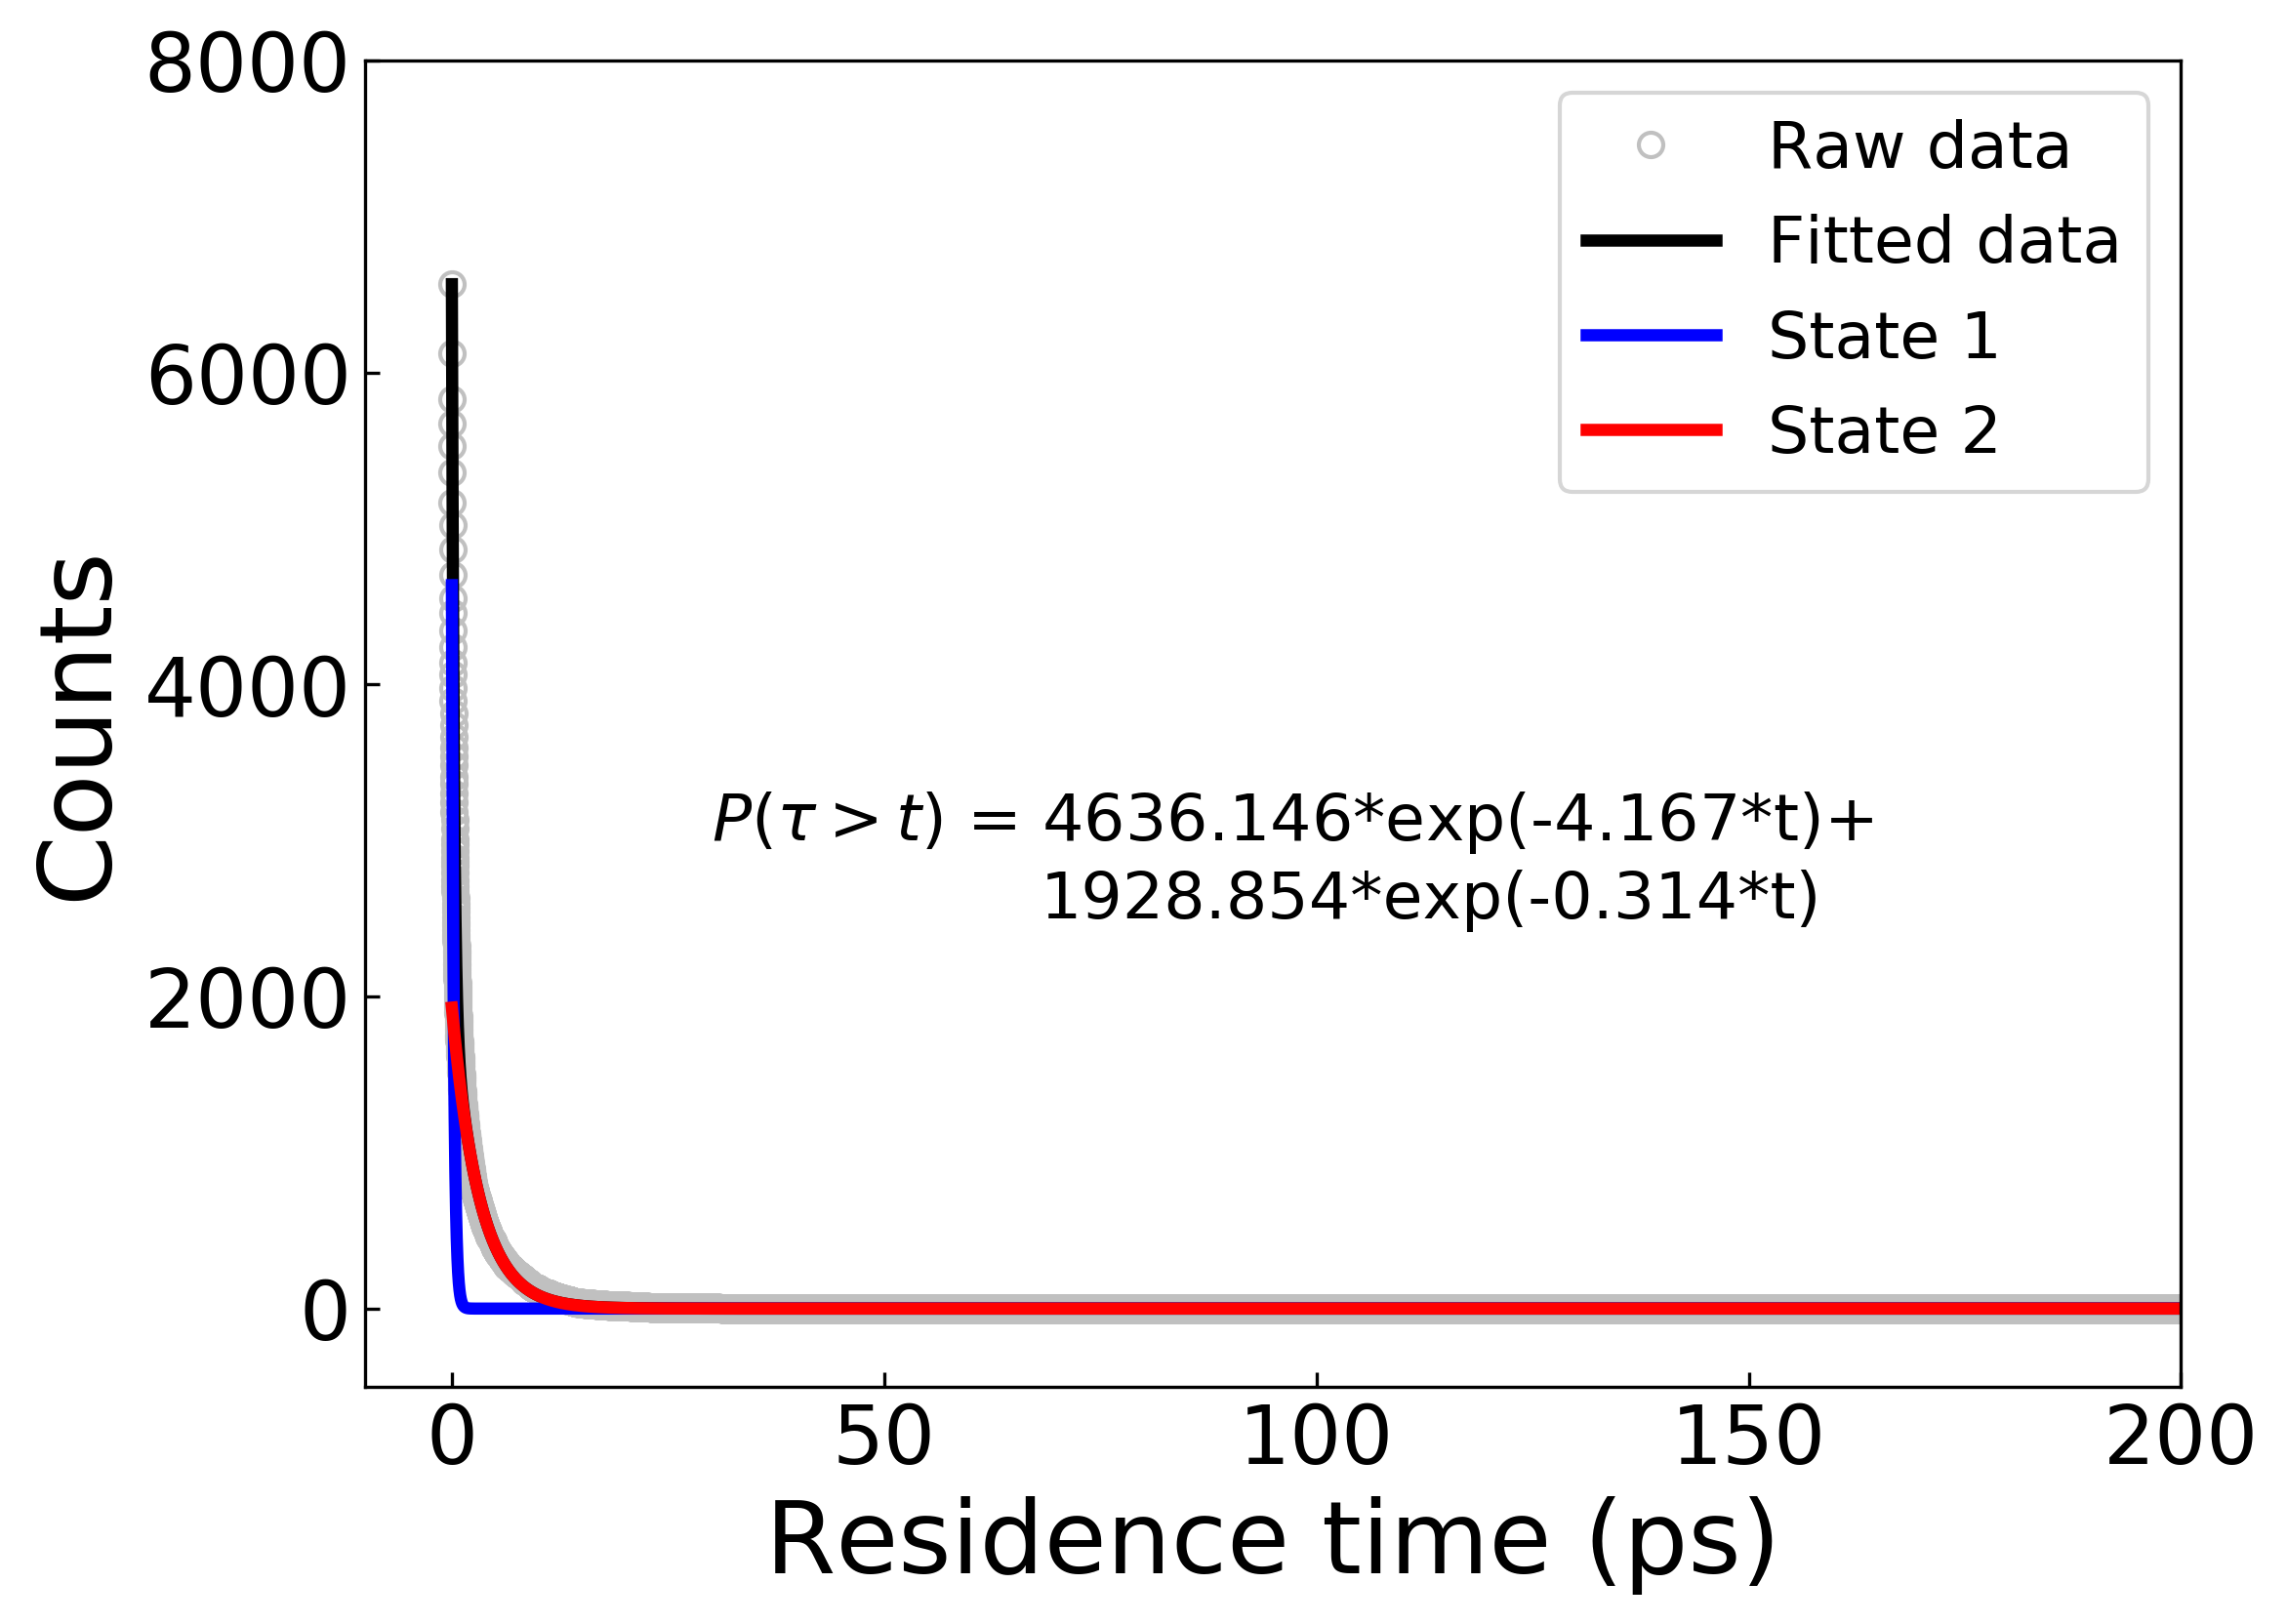

OrderedDict([('B1F',
              [['p0', 5360.717502155025, 5.528421460516298],
               ['p1', 4.05553313932436, 0.013338029488582433],
               ['p2', 0.2689222345162135, 0.0008499108633722607],
               [5360.717502155025,
                4.05553313932436,
                1940.2824978449753,
                0.2689222345162135]]),
             ('B2R',
              [['p0', 5013.382119757914, 4.893852642475661],
               ['p1', 4.570124170000761, 0.014902426447052662],
               ['p2', 0.2832096048778661, 0.0008226566582175995],
               [5013.382119757914,
                4.570124170000761,
                1897.6178802420864,
                0.2832096048778661]]),
             ('B2F',
              [['p0', 4698.548637726621, 5.212557561180694],
               ['p1', 4.766325684276582, 0.016867821707824707],
               ['p2', 0.31592573520472883, 0.0008260577037977288],
               [4698.548637726621,
                4.766325684276582,
     

In [24]:
plotTwoBulkRSDF(RSDF_sep_dict)

In [27]:
# fit adsorbed layer, with three factors
def plotThreeAdsRSDF(RSDF_sep_dict):
   
    key_list = list(RSDF_sep_dict.keys()) # ['XB1R', 'YB1R', 'XB1F', 'YB1F', 'XB2R', 'YB2R', 'XB2F', 'YB2F', 'XB3R', 'YB3R', 'XB3F', 'YB3F', 'XB4R', 'YB4R']
    ads_params_dict = OrderedDict() #params and 95% confidence of all params in adsorbed layer
    b_idx = key_list[0][1:] # first layer, B1R
    print(b_idx)
    ######### plot three free exponential for adsorbed layer 1 #################
    fig = plt.figure(figsize=(8,6), dpi=300)
    ax = fig.add_subplot(111)
    
    x = np.asarray([j/100 for j in RSDF_sep_dict[key_list[0]]])    # Lifetime, convert to [ps]
    y = np.asarray(RSDF_sep_dict[key_list[1]])                   # Cumulative probability 
    I = y[0] # initial value of RSDF
    popt, pcov = curve_fit(lambda x,a,b,c,d,e:threeFactorFunc(x,a,b,c,d,e,I=I), x, y, p0=(20,20,3.5,0.1,0.02), 
                               bounds=((0,0,0,0,0), (I,I,np.inf,np.inf,np.inf)))  #  (I,I,3.5,0.3,0.1)
    
    x = np.asarray([j/100 for j in RSDF_sep_dict[key_list[0]]])    # Lifetime, convert to [ps]
    y = np.asarray(RSDF_sep_dict[key_list[1]])                   # Cumulative probability 
    I = y[0] # initial value of RSDF
    popt, pcov = curve_fit(lambda x,a,b,c,d,e:threeFactorFunc(x,a,b,c,d,e,I=I), x, y, p0=(20,20,3.5,0.1,0.02), 
                               bounds=((0,0,0,0,0), (I,I,np.inf,np.inf,np.inf)))  #  (I,I,3.5,0.3,0.1)

    ########### 95% confidence #############
    alpha = 0.05  # 95% confidence interval = 100*(1-alpha)
    n = len(y)  # number of data points
    p = len(popt)  # number of parameters
    dof = max(0, n - p)  # number of degrees of freedom       
    # student-t value for the dof and confidence level
    tval = t.ppf(1.0 - alpha / 2., dof)
    ads_params_dict[b_idx]=[]
    for i, p, var in zip(range(n), popt, np.diag(pcov)):
        sigma = var ** 0.5
        ads_params_dict[b_idx].append(['p%i'%i,p,sigma*tval])
    ads_params_dict[b_idx].append([popt[0],popt[2],popt[1],popt[3],I-popt[0]-popt[1],popt[4]]) # [0]*exp[1] + (I-[0])*exp[2]    
    print (popt)
    
    ax.plot(x, y, 'o', mec='silver', mfc='none', markersize=12, label="Raw data") # original data
    ax.plot(x, popt[0]*np.exp(-popt[2]*x) + popt[1]*np.exp(-popt[3]*x) + (I-popt[0]-popt[1])*np.exp(-popt[4]*x), 'black', linewidth=3, label="Fitted data")
    ax.plot(x, popt[0]*np.exp(-popt[2]*x),'b', linewidth=3, label="State 1")
    ax.plot(x, popt[1]*np.exp(-popt[3]*x),'r', linewidth=3, label="State 2")
    ax.plot(x, (I-popt[0]-popt[1])*np.exp(-popt[4]*x), 'limegreen', linewidth=3, label="State 3")

    plt.xlabel('Residence time (ps)', fontsize=25)
    plt.ylabel('Counts', fontsize=25)
    plt.legend(fontsize=16)
    ax.tick_params(direction='in',labelsize=20)               
    popt = [round(a,3) for a in popt]
    x = sp.Symbol('t') 
    f = popt[0]*sp.exp(-popt[2]*x) + popt[1]*sp.exp(-popt[3]*x) + (I-popt[0]-popt[1])*sp.exp(-popt[4]*x)
    P = 'P(t) = '+str(f) 
    ax.set_xlim(-10, 200, 50)
    ax.set_ylim(-500,8000,2000)
    plt.yticks(np.arange(0, 8001, 2000)) 
    plt.show()
    
    return ads_params_dict

B1R
[3.36422205e+03 1.94039110e+03 6.83833330e+00 1.43898753e+00
 2.68946749e-02]


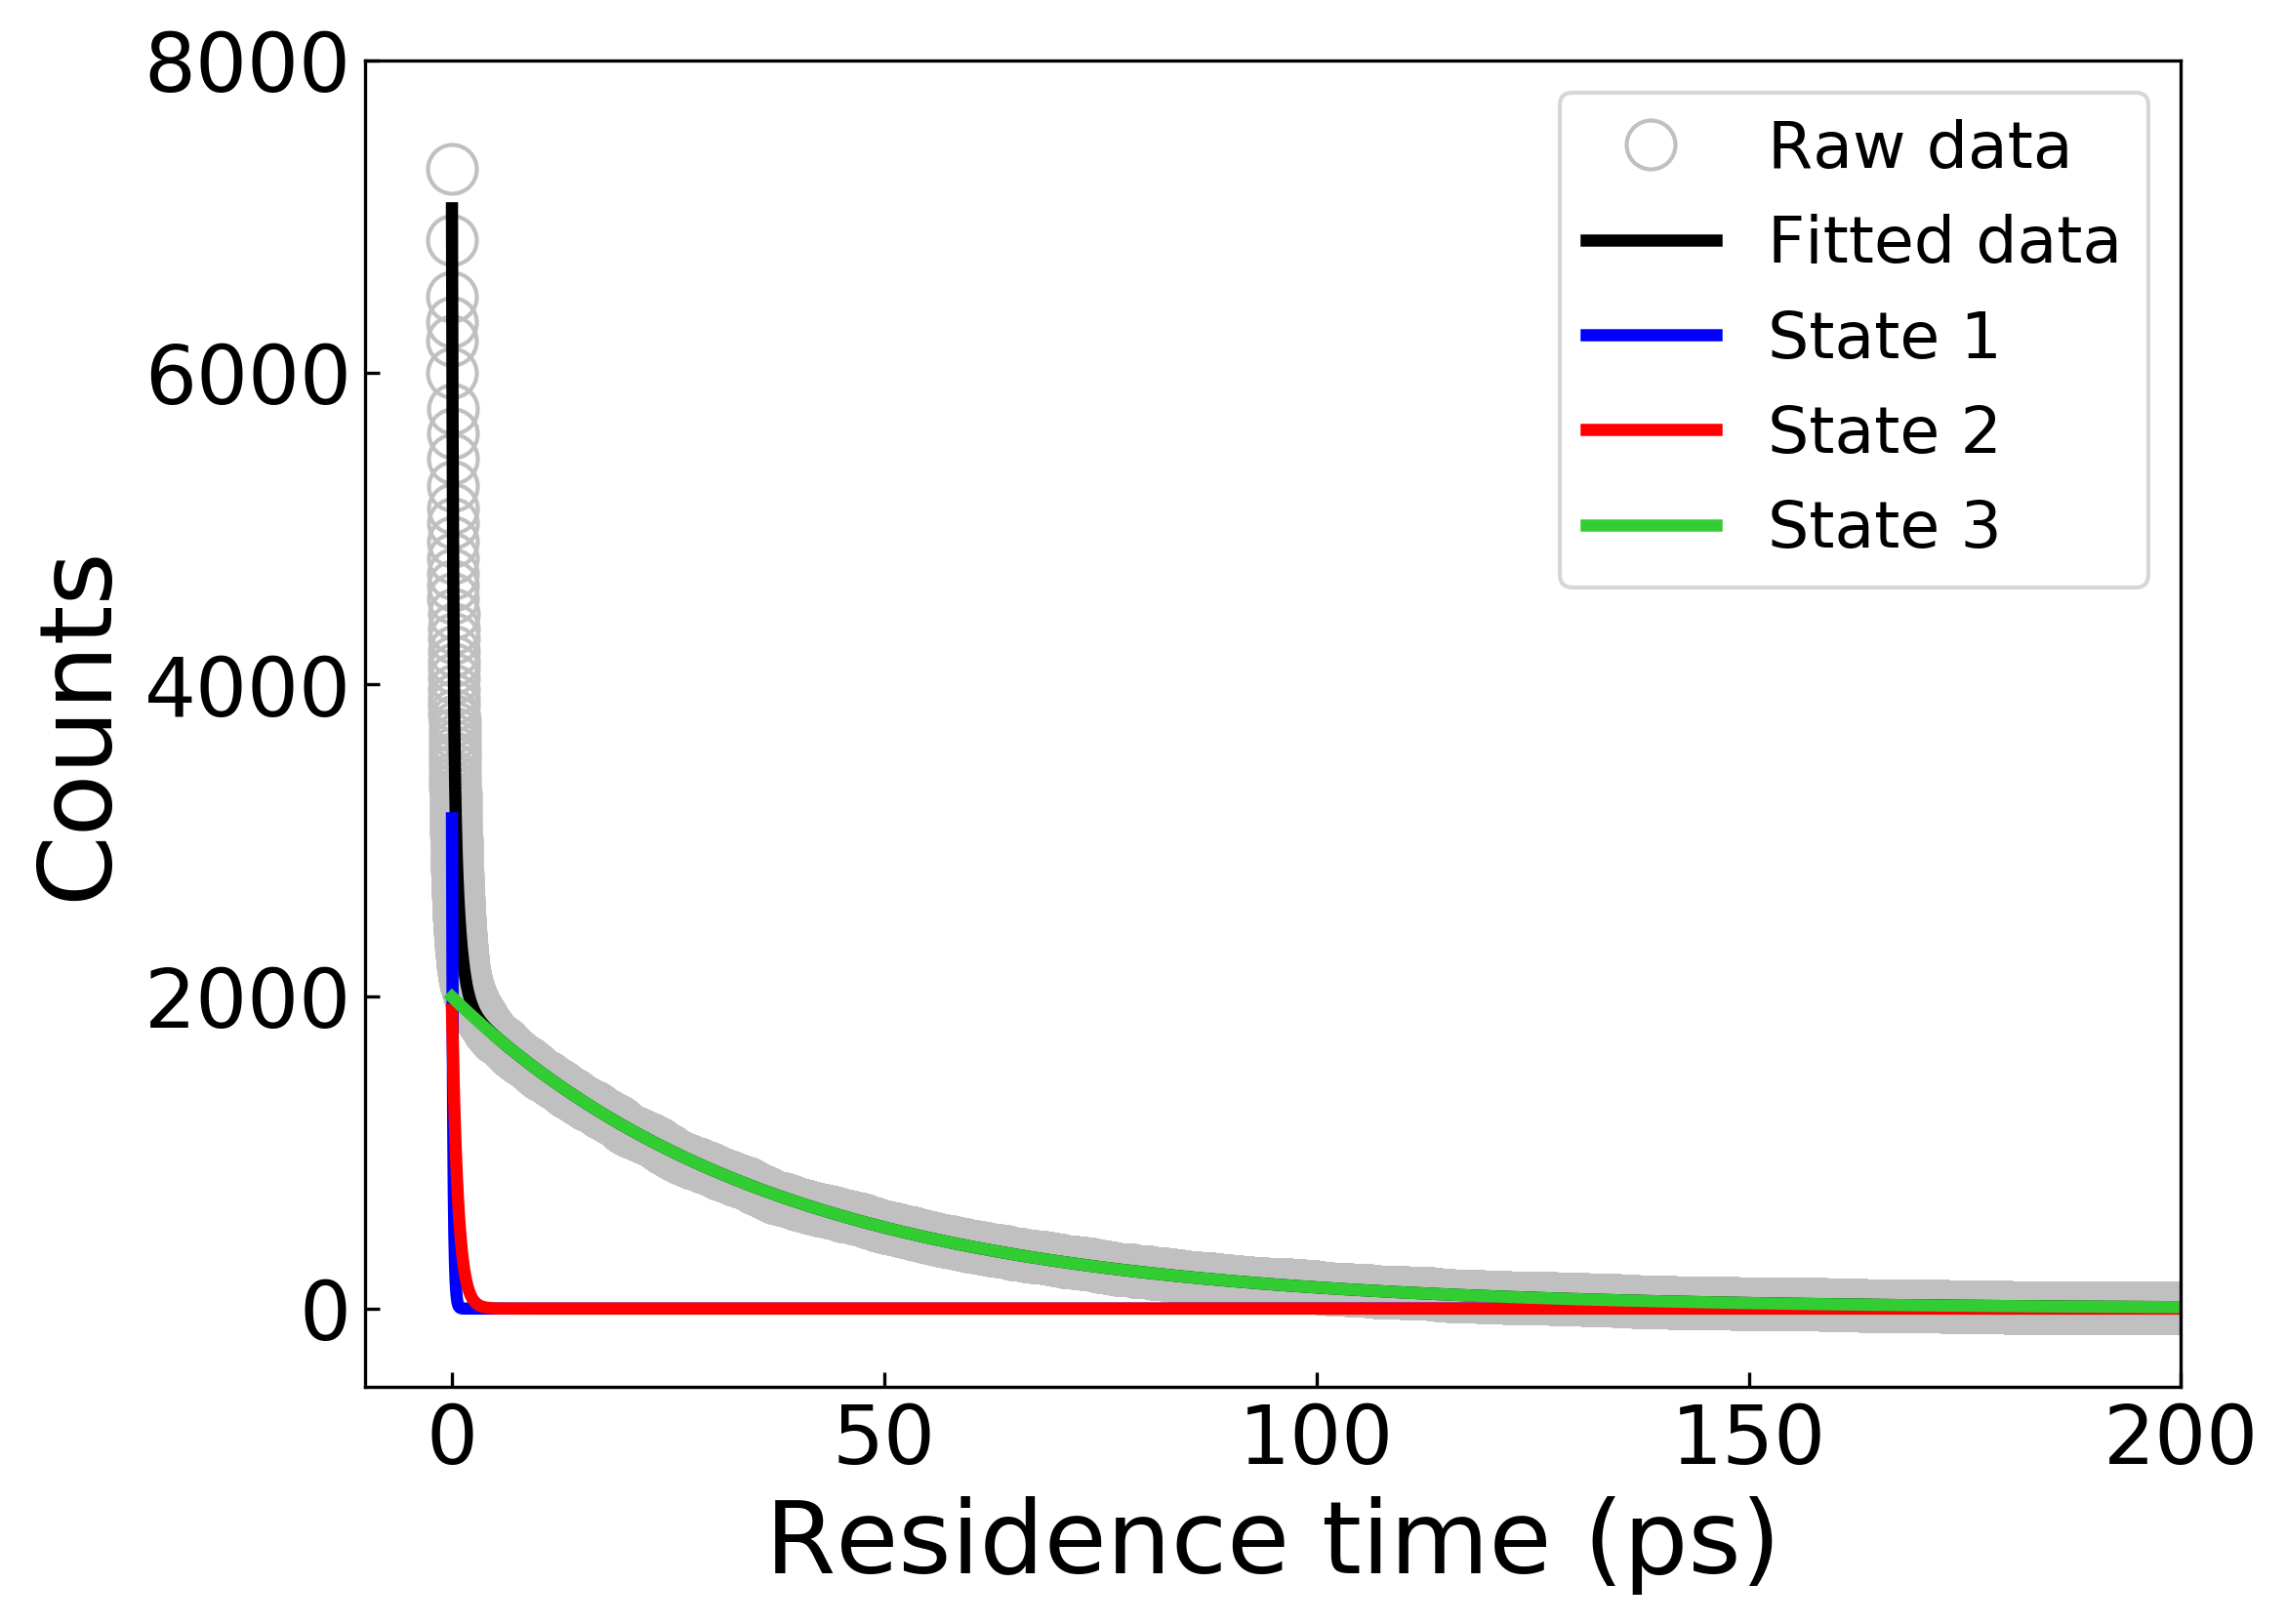

OrderedDict([('B1R',
              [['p0', 3364.2220514495307, 15.467806975255384],
               ['p1', 1940.391099447247, 15.340207957561399],
               ['p2', 6.83833329537819, 0.03799754374464395],
               ['p3', 1.4389875268392553, 0.008406120223057558],
               ['p4', 0.026894674944477275, 9.434159199708263e-06],
               [3364.2220514495307,
                6.83833329537819,
                1940.391099447247,
                1.4389875268392553,
                1997.3868491032224,
                0.026894674944477275]])])

In [28]:
plotThreeAdsRSDF(RSDF_sep_dict)